# The life of an athlete with type 1 diabetes: descriptives

Descriptives for the 2019 training season of 14 TNN athletes

In [1]:
import numpy as np
import pandas as pd
import datetime
import os
from copy import copy

from plot import *
from calc import glucose_levels, mmoll_mgdl, mgdl_mmoll
from config import DATA_PATH, rider_mapping, rider_mapping_inv

In [2]:
SAVE_PATH = 'descriptives/'

for folder in ('availability', 'hist', 'cdf', 'boxplot', 'time_in_zone', 'time_cycling'):
    if not os.path.exists(SAVE_PATH+'Dexcom/'+folder):
        os.makedirs(SAVE_PATH+'Dexcom/'+folder)

In [3]:
# color settings
color_palette = sns.color_palette("Set1")
color_sec = {'wake'	: color_palette[1],
			 'exercise': color_palette[4],
			 'recovery': color_palette[2],
			 'sleep': color_palette[3]}
palette_ath = sns.color_palette('inferno', n_colors=7)+sns.color_palette('YlGnBu', n_colors=7) # alternatives for YlGnBu: viridis_r, mako_r
color_race = {'train': color_palette[8],
              'race':(0.8455062527192158, 0.21363575247920147, 0.4145075850498335)} #'#d8366a'

color palette


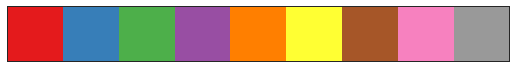

section palette


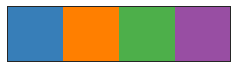

athlete palette


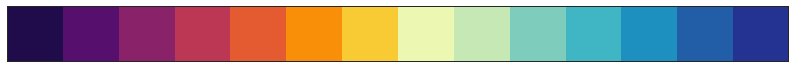

race palette


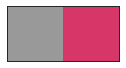

In [4]:
print("color palette")
sns.palplot(color_palette) ; plt.show()

print("section palette")
sns.palplot(color_sec.values()) ; plt.show()

print("athlete palette")
sns.palplot(palette_ath) ; plt.show()

print("race palette")
sns.palplot(color_race.values()) ; plt.show()


In [5]:
def savefig(path, i='', dtype='Dexcom', legend=None, title=None, xticks=None, yticks=None, **titlekwargs):
    if title is not None:
        plt.title(r'$\bf{Rider}$ '+r'$\bf{:d}$ - '.format(i)+title, **titlekwargs)
    if legend is not None:
        for text in legend:
            text.set_fontsize(6)
    
    plt.savefig(f'{SAVE_PATH}{dtype}/{path}_{i}.pdf', bbox_inches='tight')
    plt.savefig(f'{SAVE_PATH}{dtype}/{path}_{i}.png', dpi=300, bbox_inches='tight')
    
    if title is not None:
        plt.title(r'$\bf{:s}$ '.format(rider_mapping_inv[i])+title, **titlekwargs)
    if legend is not None:
        for c, _ in enumerate(ATHLETES):
            text = legend[c].get_text().split()
            legend[c].set_text(rider_mapping_inv[int(text[0])]+' '+' '.join(text[1:]))
    if xticks is not None:
        xticks.set_xticklabels([rider_mapping_inv[int(j.get_text())] for j in xticks.get_xticklabels()], rotation=90)
    if yticks is not None:
        yticks.set_yticklabels([rider_mapping_inv[int(j.get_text())] for j in yticks.get_yticklabels()], rotation=0)
    
    if title is not None or legend is not None or xticks is not None or yticks is not None:
        plt.savefig(f'{SAVE_PATH}{dtype}/{path}_NAME_{i}.pdf', bbox_inches='tight')
        plt.savefig(f'{SAVE_PATH}{dtype}/{path}_NAME_{i}.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

### Read data

**Athlete characteristics**

In [6]:
info = pd.read_csv(DATA_PATH+'agg/info.csv')
info = info.reset_index()
info = info.rename(columns={'index':'RIDER'})
info

RIDER gender  nationality  age  diabetes_duration     weight      bf(%)  \
0       1      M  Switzerland   22                 11  60.500000   9.066667   
1       2      M        Italy   30                 14  71.633333   8.833333   
2       3      M      Ireland   26                  7  66.733333   6.566667   
3       4      M    Australia   19                  7  78.666667   9.433333   
4       5      M  Netherlands   25                  6  69.633333   7.700000   
5       6      M    Australia   20                  9  56.700000   4.950000   
6       7      M        Italy   22                  6  65.333333   8.066667   
7       8      M  New Zealand   20                 17  65.000000  11.900000   
8       9      M       France   23                 10  63.100000   8.533333   
9      10      M           UK   27                 17  75.466667   7.700000   
10     11      M  Netherlands   24                 15  70.700000   8.900000   
11     12      M        Spain   30                  8  64.000000   5.600000   
12     13      M      Hungary   34                  1  60.333333   4.866667   
13     14      M      Finland   27                 17  75.166667   9.333333   
14     15      M       France   25                 15  73.766667   7.200000   
15     16      M   Uzbekistan   22                 13  56.666667   9.466667   
16     17      M       France   22                  4        NaN        NaN   
17     18      M           US   26                  2        NaN        NaN   

    HbA1c         FTP        LTHR       HRmax     VO2max  height  
0     6.7  307.000000  176.333333  192.333333  68.888889   174.0  
1     6.6  326.000000  168.666667  181.666667  66.915285   178.0  
2     6.8  298.000000  171.000000  180.000000  66.666164   171.0  
3     7.8  356.000000  170.333333  187.333333  67.333333   178.0  
4     6.5  341.000000  179.666667  192.666667  72.857143   183.0  
5     6.4  298.500000  173.000000  184.500000  70.781588   169.0  
6     5.9  298.500000  171.500000  180.500000  72.203125   167.0  
7     7.7  292.000000  187.000000  204.000000  64.000000   165.0  
8     7.2  278.666667  182.333333  195.000000  67.522310   173.0  
9     7.3  377.333333  177.000000  194.333333  73.982571   185.0  
10    6.4  317.000000  175.000000  190.000000  65.000000   179.0  
11    6.0  347.000000  158.333333  178.666667  75.937500   178.0  
12    6.3  345.666667  173.000000  182.333333  76.666667   179.0  
13    7.1  348.000000  169.000000  189.500000  66.500000   187.0  
14    6.4  389.000000  185.000000  198.000000  66.000000   179.0  
15    6.6  283.333333  125.610000  200.333333  74.678571   170.0  
16    NaN         NaN         NaN         NaN        NaN   167.0  
17    NaN         NaN         NaN         NaN        NaN   180.0

**Professional**

In [7]:
pro = pd.read_csv(DATA_PATH+'info/pro.csv')
pro = pro.sort_values('RIDER')

Select only people for whom we have *ethics*

In [8]:
pro = pro[pro.ethics == 1]
pro = pro.drop('ethics', axis=1)

In [9]:
pro = pro.drop('name', axis=1)
pro['RIDER'] = pro['RIDER'].astype(int)
pro = pro.reset_index(drop=True)

In [10]:
pro

RIDER 2014 2015 2016 2017 2018 2019 2020 2021
0       1    -    -    -  DEV  DEV  PRO  PRO  PRO
1       2  PRO  PRO  PRO  PRO  PRO  PRO  PRO  PRO
2       3  PRO  PRO  PRO  PRO  PRO  PRO  PRO  PRO
3       4    -    -    -  DEV  PRO  PRO  PRO  PRO
4       5    -  PRO  PRO  PRO  PRO  PRO  PRO  PRO
5       6    -    -    -  DEV  DEV  PRO  PRO  PRO
6       7    -    -  DEV  PRO  PRO  PRO  PRO  PRO
7       8    -    -    -  DEV  DEV  DEV  PRO  PRO
8       9    -    -    -  PRO  PRO  PRO  PRO  PRO
9      10    -    -  DEV  DEV  PRO  PRO  PRO  PRO
10     11    -  PRO  PRO  PRO    -  DEV  PRO  PRO
11     12  PRO  PRO  PRO  PRO  PRO  PRO  PRO  PRO
12     13    -    -    -    -    -  PRO  PRO  PRO
13     14  PRO  PRO  PRO  PRO  PRO  PRO  PRO  PRO
14     15  PRO  PRO  PRO  PRO  PRO  PRO  PRO  PRO
15     16    -    -    -  DEV  DEV  PRO  PRO  DEV
16     17    -    -    -    -    -    -    -    -
17     18    -    -    -  DEV  DEV  DEV  DEV  PRO

**Season dates**

In [11]:
season = pd.read_csv(DATA_PATH+'calendar/season_dates.csv', index_col=[0,1], header=[0,1])
season = season.reset_index().drop('level_1', axis=1)
season = season.rename(columns={'level_0':'RIDER'})

/local/home/evanweenen/.local/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [12]:
season

RIDER        2015                    2016                    2017  \
               start         end       start         end       start   
0      1         NaN         NaN         NaN         NaN  2016-12-06   
1      2  2014-11-17  2015-10-18  2015-11-24  2016-10-28  2016-11-15   
2      3  2014-11-06  2015-10-18  2015-11-06  2016-10-23  2016-12-06   
3      4         NaN         NaN         NaN         NaN  2016-11-15   
4      5  2014-11-14  2015-11-08  2015-11-27  2016-10-30  2016-11-12   
5      6         NaN         NaN         NaN         NaN  2016-12-12   
6      7         NaN         NaN  2015-10-07  2016-04-16  2016-11-07   
7      8         NaN         NaN         NaN         NaN  2016-12-14   
8      9         NaN         NaN         NaN         NaN  2016-12-06   
9     10         NaN         NaN  2015-11-06  2016-10-17  2016-11-04   
10    11  2014-11-02  2015-11-12  2015-12-01  2016-11-12  2016-12-07   
11    12  2014-11-15  2015-10-29  2015-11-24  2016-10-22  2016-11-07   
12    13         NaN         NaN         NaN         NaN         NaN   
13    14  2014-11-14  2015-10-25  2015-12-02  2016-10-30  2016-11-13   
14    15  2014-11-17  2015-10-18  2015-11-12  2016-10-23  2016-11-14   
15    16         NaN         NaN         NaN         NaN  2016-12-14   
16    17         NaN         NaN         NaN         NaN         NaN   
17    18         NaN         NaN         NaN         NaN  2016-12-13   

                      2018                    2019                    2020  \
           end       start         end       start         end       start   
0   2017-11-05  2017-11-13  2018-10-20  2018-11-05  2019-10-20  2019-11-04   
1   2017-09-11  2017-10-23  2018-10-02  2018-10-23  2019-10-16  2019-11-04   
2   2017-10-05  2017-11-13  2018-10-31  2018-11-19  2019-10-20  2019-11-13   
3   2017-09-30  2017-10-05  2018-11-01  2018-11-12  2019-10-16  2019-11-04   
4   2017-09-23  2017-10-03  2018-10-17  2018-11-12  2019-10-20  2019-11-11   
5   2017-10-14  2017-10-30  2018-10-25  2018-12-01  2019-10-01  2019-10-21   
6   2017-11-05  2017-11-28  2018-10-17  2018-11-29  2019-10-27  2019-12-02   
7   2017-11-05  2017-11-19  2018-12-12  2018-12-24  2019-10-16  2019-10-24   
8   2017-11-05  2017-11-20  2018-09-24  2018-11-05  2019-09-23  2019-10-14   
9   2017-11-12  2017-11-27  2018-11-10  2018-11-22  2019-10-28  2019-11-11   
10  2017-10-22         NaN         NaN  2018-10-15  2019-06-23  2019-10-23   
11  2017-10-31  2017-11-06  2018-11-11  2018-11-26  2019-11-05  2019-11-18   
12         NaN         NaN         NaN  2018-12-12  2019-10-20  2019-11-18   
13  2017-11-20  2017-12-21  2018-11-01  2018-11-12  2019-09-09  2019-10-21   
14  2017-11-01  2017-11-27  2018-10-21  2018-11-12  2019-10-20  2019-11-09   
15  2017-09-10  2017-11-21  2018-11-02  2018-11-19  2019-09-29  2019-11-14   
16         NaN         NaN         NaN         NaN         NaN         NaN   
17  2017-10-22  2017-11-20  2018-08-12  2018-10-22  2019-10-13  2019-11-09   

                      2021              
           end       start         end  
0   2020-09-23  2020-10-08  2021-10-30  
1   2020-10-11  2020-11-09  2021-10-04  
2   2020-10-16  2020-11-16  2021-10-03  
3   2020-10-28  2020-11-16  2021-08-14  
4   2020-10-31  2020-11-16  2021-08-31  
5   2020-07-17  2020-11-01  2021-09-03  
6   2020-10-12  2020-11-09  2021-09-30  
7   2020-09-27  2020-11-01  2021-10-03  
8   2020-10-12  2020-11-05  2021-10-01  
9   2020-10-11  2020-11-16  2021-10-17  
10  2020-10-02  2020-11-01  2021-09-17  
11  2020-10-08  2020-11-01  2021-09-03  
12  2020-10-11  2020-11-16  2021-09-05  
13  2020-10-12  2020-11-02  2021-09-20  
14  2020-10-15  2020-11-07  2021-10-29  
15  2020-10-31  2020-11-23  2021-09-30  
16         NaN         NaN         NaN  
17  2020-10-18  2020-11-11  2021-10-05

**TrainingPeaks (aggregated)**

In [13]:
tp_agg = pd.read_csv(DATA_PATH+'agg/trainingpeaks_day.csv', index_col=[0,1], header=[0,1])
tp_agg = tp_agg.reset_index()
tp_agg['date'] = pd.to_datetime(tp_agg['date'])

In [14]:
tp_agg

RIDER       date            TIME                       \
                       timestamp_count  local_timestamp_min   
0         1 2016-11-22          7446.0  2016-11-22 12:58:57   
1         1 2016-11-23          7312.0  2016-11-23 14:29:13   
2         1 2016-11-24          6285.0  2016-11-24 09:53:38   
3         1 2016-11-26          7445.0  2016-11-26 10:00:35   
4         1 2016-12-06         11222.0  2016-12-06 09:11:34   
...     ...        ...             ...                  ...   
30208    18 2021-11-18          4767.0  2021-11-18 14:58:17   
30209    18 2021-11-25         10912.0  2021-11-25 09:50:57   
30210    18 2021-11-26          8737.0  2021-11-26 10:12:34   
30211    18 2021-11-27         18222.0  2021-11-27 09:31:58   
30212    18 2021-11-28         14549.0  2021-11-28 10:02:22   

                           CALENDAR                                   \
       local_timestamp_max     race travel race_3d_mean race_7d_mean   
0      2016-11-22 15:15:40    False   True          0.0          0.0   
1      2016-11-23 16:35:14    False  False          0.0          0.0   
2      2016-11-24 16:56:38    False  False          0.0          0.0   
3      2016-11-26 12:12:52    False  False          0.0          0.0   
4      2016-12-06 16:11:38    False  False          0.0          0.0   
...                    ...      ...    ...          ...          ...   
30208  2021-11-18 16:19:15    False  False          0.0          0.0   
30209  2021-11-25 12:54:14    False  False          0.0          0.0   
30210  2021-11-26 12:39:08    False  False          0.0          0.0   
30211  2021-11-27 14:36:43    False  False          0.0          0.0   
30212  2021-11-28 14:21:57    False  False          0.0          0.0   

                     ...          LOC                            \
      travel_3d_any  ... altitude_min altitude_max altitude_sum   
0              True  ...        420.2        638.4    3762146.2   
1              True  ...        397.6        419.4    2943286.4   
2              True  ...        398.6        617.2    3075728.2   
3             False  ...        403.4        539.6    3308437.6   
4             False  ...        262.4        317.4    3304494.0   
...             ...  ...          ...          ...          ...   
30208         False  ...          3.0        122.8     197431.2   
30209         False  ...         63.8        456.6    2189425.0   
30210         False  ...         25.2        265.2    1188206.6   
30211         False  ...          8.2        571.0    4657435.6   
30212         False  ...         -1.6        246.4    1179300.8   

                                                                \
      altitude_energy altitude_peaks altitude_rms altitude_iqr   
0        1.918528e+09           55.0   507.601133         74.4   
1        1.184854e+09           63.0   402.544830          3.4   
2        1.520113e+09           70.0   491.796268         60.8   
3        1.484794e+09           59.0   446.581468         77.4   
4        9.742210e+08           49.0   294.641286          7.8   
...               ...            ...          ...          ...   
30208    1.640014e+07           19.0    58.654487          NaN   
30209    5.633783e+08           68.0   227.220688          NaN   
30210    2.107692e+08          126.0   155.318208          NaN   
30211    1.566215e+09          197.0   293.175503          NaN   
30212    1.559206e+08          250.0   103.522611          NaN   

                                                           
      distance_up_iqr elevation_gain_iqr acceleration_iqr  
0                 NaN                NaN              NaN  
1                 NaN                NaN              NaN  
2                 NaN                NaN              NaN  
3                 NaN                NaN              NaN  
4                 NaN                NaN              NaN  
...               ...                ...              ...  
30208             NaN                N

**Dexcom (aggregated)**

In [15]:
dc_agg = pd.read_csv(DATA_PATH+'agg/dexcom_day.csv')
dc_agg['date'] = pd.to_datetime(dc_agg['date'])

/local/home/evanweenen/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (69,70) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
dc_agg

RIDER       date  time_in_hypo_exercise  time_in_hypoL2_exercise  \
0          1 2013-12-31                    NaN                      NaN   
1          1 2014-01-01                    NaN                      NaN   
2          1 2014-01-02                    NaN                      NaN   
3          1 2014-01-03                    NaN                      NaN   
4          1 2014-01-04                    NaN                      NaN   
...      ...        ...                    ...                      ...   
52610     18 2021-12-28                    NaN                      NaN   
52611     18 2021-12-29                    NaN                      NaN   
52612     18 2021-12-30                    NaN                      NaN   
52613     18 2021-12-31                    NaN                      NaN   
52614     18 2022-01-01                    NaN                      NaN   

       time_in_hypoL1_exercise  time_in_target_exercise  \
0                          NaN                      NaN   
1                          NaN                      NaN   
2                          NaN                      NaN   
3                          NaN                      NaN   
4                          NaN                      NaN   
...                        ...                      ...   
52610                      NaN                      NaN   
52611                      NaN                      NaN   
52612                      NaN                      NaN   
52613                      NaN                      NaN   
52614                      NaN                      NaN   

       time_in_hyper_exercise  time_in_hyperL1_exercise  \
0                         NaN                       NaN   
1                         NaN                       NaN   
2                         NaN                       NaN   
3                         NaN                       NaN   
4                         NaN                       NaN   
...                       ...                       ...   
52610                     NaN                       NaN   
52611                     NaN                       NaN   
52612                     NaN                       NaN   
52613                     NaN                       NaN   
52614                     NaN                       NaN   

       time_in_hyperL2_exercise  glucose_mean_exercise  ...  glucose_mean_7d  \
0                           NaN                    NaN  ...              NaN   
1                           NaN                    NaN  ...              NaN   
2                           NaN                    NaN  ...              NaN   
3                           NaN                    NaN  ...              NaN   
4                           NaN                    NaN  ...              NaN   
...                         ...                    ...  ...              ...   
52610                       NaN                    NaN  ...              NaN   
52611                       NaN                    NaN  ...              NaN   
52612                       NaN                    NaN  ...              NaN   
52613                       NaN                    NaN  ...              NaN   
52614                       NaN                    NaN  ...              NaN   

       glucose_std_7d  glucose_cv_7d  glucose_rate_7d  completeness_7d  \
0                 NaN            NaN              NaN              0.0   
1                 NaN            NaN              NaN              0.0   
2                 NaN            NaN              NaN              0.0   
3                 NaN            NaN              NaN              0.0   
4                 NaN            NaN              NaN              0.0   
...               ...            ...              ...              ...   
52610             NaN            NaN              NaN              0.0   
52611             NaN            NaN              NaN              0.0   
52612             NaN            NaN              NaN        

**Dexcom (full)**

In [17]:
dc = pd.read_csv(DATA_PATH+'Dexcom/clean/dexcom_clean5.csv')

In [18]:
dc['timestamp'] = pd.to_datetime(dc['timestamp'])
dc['local_timestamp'] = pd.to_datetime(dc['local_timestamp'])

In [19]:
dc['date'] = pd.to_datetime(dc.local_timestamp.dt.date)

In [20]:
dc

RIDER           timestamp  Glucose Value (mg/dL)  \
0             1 2014-01-01 00:00:00                    NaN   
1             1 2014-01-01 00:05:00                    NaN   
2             1 2014-01-01 00:10:00                    NaN   
3             1 2014-01-01 00:15:00                    NaN   
4             1 2014-01-01 00:20:00                    NaN   
...         ...                 ...                    ...   
15147643     18 2021-12-31 23:35:00                    NaN   
15147644     18 2021-12-31 23:40:00                    NaN   
15147645     18 2021-12-31 23:45:00                    NaN   
15147646     18 2021-12-31 23:50:00                    NaN   
15147647     18 2021-12-31 23:55:00                    NaN   

             local_timestamp  exercise  recovery   wake  sleep   race  travel  \
0        2013-12-31 20:00:00     False     False   True  False  False   False   
1        2013-12-31 20:05:00     False     False   True  False  False   False   
2        2013-12-31 20:10:00     False     False   True  False  False   False   
3        2013-12-31 20:15:00     False     False   True  False  False   False   
4        2013-12-31 20:20:00     False     False   True  False  False   False   
...                      ...       ...       ...    ...    ...    ...     ...   
15147643 2022-01-01 00:35:00     False     False  False   True  False   False   
15147644 2022-01-01 00:40:00     False     False  False   True  False   False   
15147645 2022-01-01 00:45:00     False     False  False   True  False   False   
15147646 2022-01-01 00:50:00     False     False  False   True  False   False   
15147647 2022-01-01 00:55:00     False     False  False   True  False   False   

               date  
0        2013-12-31  
1        2013-12-31  
2        2013-12-31  
3        2013-12-31  
4        2013-12-31  
...             ...  
15147643 2022-01-01  
15147644 2022-01-01  
15147645 2022-01-01  
15147646 2022-01-01  
15147647 2022-01-01  

[15147648 rows x 11 columns]

### Plot data availability

In [21]:
def plot_availability(df_avail, cmap='Blues', rot_months=0, itv_months=1, vmin=0, vmax=1, plot_percentage=True, plot_colorbar=True):
    fig, ax = plt.subplots(figsize=(15,6))
    ax = sns.heatmap(df_avail, cmap=cmap, vmin=vmin, vmax=vmax)

    if plot_percentage:
        # put total percentage on RHS
        ax2 = ax.secondary_yaxis("right")
        ax2.set_yticks(np.arange(len(df_avail.index))+0.5)
        ax2.set_yticklabels([r"$\bf{:.0f}\%$".format(i) for i in df_avail.sum(axis=1)/df_avail.notna().sum(axis=1)*100])
        ax2.tick_params(axis='y', length=0)
        ax2.spines['right'].set_visible(False)
        ax.text(0.99, 1.02, r'$\bf{:s}$'.format('Total (\%)'), ha='left', transform=ax.transAxes)

    if plot_colorbar:
        # adjust ticks colorbar
        cbar_ax = fig.get_axes()[1]
        cbar_ax.set_yticks([0, .2, .4, .6, .8, 1.])
        cbar_ax.set_yticklabels(["{:.0f}%".format(i*100) for i in [0, .2, .4, .6, .8, 1.]])
        cbar_ax.text(3., 0.5, 'Percentage of max. CGM readings per day', va='center', rotation=270)

    monthyear = df_avail.columns.strftime("%b '%y")
    ticksloc = np.where(monthyear.to_series().shift() != monthyear.to_series())[0][1::itv_months]
    plt.xticks(ticks=ticksloc, labels=monthyear[ticksloc], rotation=rot_months)
    plt.xlabel('date')
    plt.ylabel('rider')
    return ax

In [22]:
dc_avail = dc_agg.pivot(index='RIDER', columns='date', values='completeness_1d')
dc_avail

date   2013-12-31  2014-01-01  2014-01-02  2014-01-03  2014-01-04  2014-01-05  \
RIDER                                                                           
1             0.0         0.0         0.0         0.0         0.0         0.0   
2             NaN         0.0         0.0         0.0         0.0         0.0   
3             NaN         0.0         0.0         0.0         0.0         0.0   
4             NaN         0.0         0.0         0.0         0.0         0.0   
5             NaN         0.0         0.0         0.0         0.0         0.0   
6             NaN         0.0         0.0         0.0         0.0         0.0   
7             NaN         0.0         0.0         0.0         0.0         0.0   
8             NaN         0.0         0.0         0.0         0.0         0.0   
9             NaN         0.0         0.0         0.0         0.0         0.0   
10            NaN         0.0         0.0         0.0         0.0         0.0   
11            NaN         0.0         0.0         0.0         0.0         0.0   
12            NaN         0.0         0.0         0.0         0.0         0.0   
13            NaN         0.0         0.0         0.0         0.0         0.0   
14            NaN         0.0         0.0         0.0         0.0         0.0   
15            NaN         0.0         0.0         0.0         0.0         0.0   
16            NaN         0.0         0.0         0.0         0.0         0.0   
17            NaN         0.0         0.0         0.0         0.0         0.0   
18            NaN         0.0         0.0         0.0         0.0         0.0   

date   2014-01-06  2014-01-07  2014-01-08  2014-01-09  ...  2021-12-23  \
RIDER                                                  ...               
1             0.0         0.0         0.0         0.0  ...         0.0   
2             0.0         0.0         0.0         0.0  ...         0.0   
3             0.0         0.0         0.0         0.0  ...         0.0   
4             0.0         0.0         0.0         0.0  ...         0.0   
5             0.0         0.0         0.0         0.0  ...         0.0   
6             0.0         0.0         0.0         0.0  ...         0.0   
7             0.0         0.0         0.0         0.0  ...         0.0   
8             0.0         0.0         0.0         0.0  ...         0.0   
9             0.0         0.0         0.0         0.0  ...         0.0   
10            0.0         0.0         0.0         0.0  ...         0.0   
11            0.0         0.0         0.0         0.0  ...         0.0   
12            0.0         0.0         0.0         0.0  ...         0.0   
13            0.0         0.0         0.0         0.0  ...         0.0   
14            0.0         0.0         0.0         0.0  ...         0.0   
15            0.0         0.0         0.0         0.0  ...         0.0   
16            0.0         0.0         0.0         0.0  ...         0.0   
17            0.0         0.0         0.0         0.0  ...         0.0   
18            0.0         0.0         0.0         0.0  ...         0.0   

date   2021-12-24  2021-12-25  2021-12-26  2021-12-27  2021-12-28  2021-12-29  \
RIDER                                                                           
1             0.0         0.0         0.0         0.0         0.0         0.0   
2             0.0         0.0         0.0         0.0         0.0         0.0   
3             0.0         0.0         0.0         0.0         0.0         0.0   
4             0.0         0.0         0.0         0.0         0.0         0.0   
5             0.0         0.0         0.0         0.0         0.0         0.0   
6             0.0         0.0         0.0         0.0         0.0         0.0   
7             0.0         0.0         0.0         0.0         0.0         0.0   
8             0.0         0.0         0.0         0.0         0.0         0.0   
9             0.0         0.0         0.0         0.0         0.0         0.0   
10     

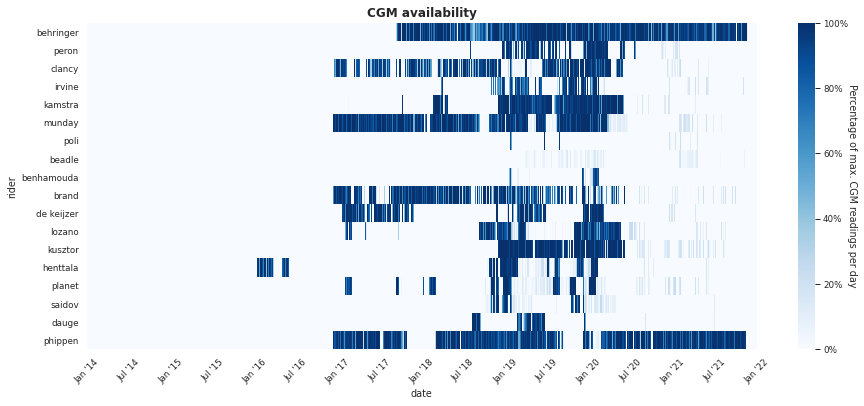

In [23]:
ax = plot_availability(dc_avail, rot_months=45, itv_months=6, plot_percentage=False)
plt.title('CGM availability', fontweight='bold', fontsize=12)
savefig('availability/glucose_availability_all', yticks=ax)

In [24]:
pro_list = pro.set_index('RIDER').stack().replace({'-':'np.nan'}).reset_index().rename(columns={'level_1':'year', 0:'pro'})
pro_list['year'] = pro_list['year'].astype(int)
pro_list.columns = pd.MultiIndex.from_product([pro_list.columns, ['']])
pro_list

RIDER  year     pro
                       
0       1  2014  np.nan
1       1  2015  np.nan
2       1  2016  np.nan
3       1  2017     DEV
4       1  2018     DEV
..    ...   ...     ...
139    18  2017     DEV
140    18  2018     DEV
141    18  2019     DEV
142    18  2020     DEV
143    18  2021     PRO

[144 rows x 3 columns]

In [25]:
tp_agg['year'] = tp_agg['date'].dt.year
tp_agg = pd.merge(tp_agg, pro_list, on=['RIDER', 'year'], how='left')
tp_agg = tp_agg.drop([('year')], axis=1)
tp_agg

/local/home/evanweenen/.local/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


RIDER       date            TIME                       \
                       timestamp_count  local_timestamp_min   
0         1 2016-11-22          7446.0  2016-11-22 12:58:57   
1         1 2016-11-23          7312.0  2016-11-23 14:29:13   
2         1 2016-11-24          6285.0  2016-11-24 09:53:38   
3         1 2016-11-26          7445.0  2016-11-26 10:00:35   
4         1 2016-12-06         11222.0  2016-12-06 09:11:34   
...     ...        ...             ...                  ...   
30208    18 2021-11-18          4767.0  2021-11-18 14:58:17   
30209    18 2021-11-25         10912.0  2021-11-25 09:50:57   
30210    18 2021-11-26          8737.0  2021-11-26 10:12:34   
30211    18 2021-11-27         18222.0  2021-11-27 09:31:58   
30212    18 2021-11-28         14549.0  2021-11-28 10:02:22   

                           CALENDAR                                   \
       local_timestamp_max     race travel race_3d_mean race_7d_mean   
0      2016-11-22 15:15:40    False   True          0.0          0.0   
1      2016-11-23 16:35:14    False  False          0.0          0.0   
2      2016-11-24 16:56:38    False  False          0.0          0.0   
3      2016-11-26 12:12:52    False  False          0.0          0.0   
4      2016-12-06 16:11:38    False  False          0.0          0.0   
...                    ...      ...    ...          ...          ...   
30208  2021-11-18 16:19:15    False  False          0.0          0.0   
30209  2021-11-25 12:54:14    False  False          0.0          0.0   
30210  2021-11-26 12:39:08    False  False          0.0          0.0   
30211  2021-11-27 14:36:43    False  False          0.0          0.0   
30212  2021-11-28 14:21:57    False  False          0.0          0.0   

                     ...          LOC                               \
      travel_3d_any  ... altitude_max altitude_sum altitude_energy   
0              True  ...        638.4    3762146.2    1.918528e+09   
1              True  ...        419.4    2943286.4    1.184854e+09   
2              True  ...        617.2    3075728.2    1.520113e+09   
3             False  ...        539.6    3308437.6    1.484794e+09   
4             False  ...        317.4    3304494.0    9.742210e+08   
...             ...  ...          ...          ...             ...   
30208         False  ...        122.8     197431.2    1.640014e+07   
30209         False  ...        456.6    2189425.0    5.633783e+08   
30210         False  ...        265.2    1188206.6    2.107692e+08   
30211         False  ...        571.0    4657435.6    1.566215e+09   
30212         False  ...        246.4    1179300.8    1.559206e+08   

                                                                \
      altitude_peaks altitude_rms altitude_iqr distance_up_iqr   
0               55.0   507.601133         74.4             NaN   
1               63.0   402.544830          3.4             NaN   
2               70.0   491.796268         60.8             NaN   
3               59.0   446.581468         77.4             NaN   
4               49.0   294.641286          7.8             NaN   
...              ...          ...          ...             ...   
30208           19.0    58.654487          NaN             NaN   
30209           68.0   227.220688          NaN             NaN   
30210          126.0   155.318208          NaN             NaN   
30211          197.0   293.175503          NaN             NaN   
30212          250.0   103.522611          NaN             NaN   

                                              pro  
      elevation_gain_iqr acceleration_iqr          
0                    NaN              NaN  np.nan  
1                    NaN              NaN  np.nan  
2                    NaN              NaN  np.nan  
3                    NaN              NaN  np.nan  
4                    NaN              NaN  np.nan  
...                  ...              ...     ...  
30208                NaN              NaN     PRO  
30209      

In [26]:
tp_avail = tp_agg.pivot(index='RIDER', columns='date', values='pro')
tp_avail = tp_avail.replace({'PRO':2, 'DEV':1, 'np.nan':np.nan})
tp_avail

date   2014-01-01  2014-01-02  2014-01-03  2014-01-04  2014-01-05  2014-01-06  \
RIDER                                                                           
1             NaN         NaN         NaN         NaN         NaN         NaN   
2             2.0         2.0         2.0         NaN         NaN         2.0   
3             NaN         2.0         2.0         NaN         NaN         2.0   
4             NaN         NaN         NaN         NaN         NaN         NaN   
5             NaN         NaN         NaN         NaN         NaN         NaN   
6             NaN         NaN         NaN         NaN         NaN         NaN   
7             NaN         NaN         NaN         NaN         NaN         NaN   
8             NaN         NaN         NaN         NaN         NaN         NaN   
9             NaN         NaN         NaN         NaN         NaN         NaN   
10            NaN         NaN         NaN         NaN         NaN         NaN   
11            NaN         NaN         NaN         NaN         NaN         NaN   
12            2.0         2.0         2.0         NaN         2.0         2.0   
13            NaN         NaN         NaN         NaN         NaN         NaN   
14            NaN         2.0         2.0         2.0         2.0         2.0   
15            NaN         NaN         NaN         NaN         NaN         NaN   
16            NaN         NaN         NaN         NaN         NaN         NaN   
17            NaN         NaN         NaN         NaN         NaN         NaN   
18            NaN         NaN         NaN         NaN         NaN         NaN   

date   2014-01-07  2014-01-08  2014-01-09  2014-01-10  ...  2021-12-11  \
RIDER                                                  ...               
1             NaN         NaN         NaN         NaN  ...         NaN   
2             2.0         NaN         2.0         2.0  ...         NaN   
3             NaN         2.0         2.0         2.0  ...         NaN   
4             NaN         NaN         NaN         NaN  ...         2.0   
5             NaN         NaN         NaN         NaN  ...         NaN   
6             NaN         NaN         NaN         NaN  ...         NaN   
7             NaN         NaN         NaN         NaN  ...         2.0   
8             NaN         NaN         NaN         NaN  ...         2.0   
9             NaN         NaN         NaN         NaN  ...         NaN   
10            NaN         NaN         NaN         NaN  ...         NaN   
11            NaN         NaN         NaN         NaN  ...         NaN   
12            2.0         NaN         2.0         2.0  ...         NaN   
13            NaN         NaN         NaN         NaN  ...         NaN   
14            2.0         2.0         2.0         2.0  ...         NaN   
15            NaN         NaN         NaN         NaN  ...         NaN   
16            NaN         NaN         NaN         NaN  ...         1.0   
17            NaN         NaN         NaN         NaN  ...         NaN   
18            NaN         NaN         NaN         NaN  ...         NaN   

date   2021-12-12  2021-12-13  2021-12-14  2021-12-15  2021-12-16  2021-12-17  \
RIDER                                                                           
1             NaN         NaN         NaN         NaN         NaN         NaN   
2             NaN         NaN         NaN         NaN         NaN         NaN   
3             NaN         NaN         NaN         NaN         NaN         NaN   
4             2.0         2.0         NaN         NaN         NaN         NaN   
5             NaN         NaN         NaN         2.0         NaN         NaN   
6             NaN         NaN         NaN         NaN         NaN         NaN   
7             NaN         2.0         2.0         2.0         2.0         2.0   
8             2.0         NaN         2.0         2.0         2.0         2.0   
9             NaN         2.0         2.0         2.0         2.0         NaN   
10     

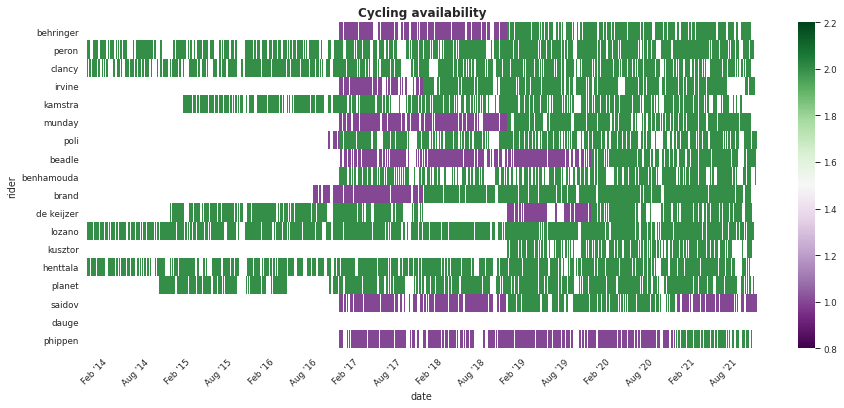

In [27]:
ax = plot_availability(tp_avail, cmap='PRGn', vmin=0.8, vmax=2.2, 
                       rot_months=45, itv_months=6, plot_percentage=False, plot_colorbar=False)
plt.title('Cycling availability', fontweight='bold', fontsize=12)
savefig('availability/glucose_availability_all', dtype='TrainingPeaks', yticks=ax)

### Select data

In [28]:
print("Data available: ")
print("TrainingPeaks: N =", len(tp_agg.RIDER.unique()), "; D =", len(tp_agg))
print("Dexcom: N =", len(dc.RIDER.unique()), "; D =", len(dc.dropna(subset=['Glucose Value (mg/dL)'])[['RIDER', 'date']].drop_duplicates()))

Data available: 
TrainingPeaks: N = 18 ; D = 30213
Dexcom: N = 18 ; D = 11785


Select riders that were pro in 2019

In [29]:
ATHLETES = pro.loc[pro['2019'] == 'PRO', 'RIDER'].to_list()

In [30]:
info = info[info.RIDER.isin(ATHLETES)].set_index('RIDER')
season = season[season.RIDER.isin(ATHLETES)].set_index('RIDER')

In [31]:
print("Data available: ")
print("TrainingPeaks: N =", len(tp_agg[tp_agg.RIDER.isin(ATHLETES)].RIDER.unique()), "; D =", len(tp_agg[tp_agg.RIDER.isin(ATHLETES)]))
print("Dexcom: N =", len(dc[dc.RIDER.isin(ATHLETES)].RIDER.unique()), "; D =", len(dc[dc.RIDER.isin(ATHLETES)].dropna(subset=['Glucose Value (mg/dL)'])[['RIDER', 'date']].drop_duplicates()))

Data available: 
TrainingPeaks: N = 14 ; D = 25116
Dexcom: N = 14 ; D = 9228


Select beginning and end of the training season in 2019

In [32]:
season = season['2019']

In [33]:
season['start'] = pd.to_datetime(season['start'])
season['end'] = pd.to_datetime(season['end'])

In [34]:
season_list = season.apply(lambda x: pd.date_range(x[0], x[1], freq='1D'), axis=1)\
    .apply(pd.Series).stack().reset_index().drop('level_1', axis=1).rename(columns={0:'date'})

In [35]:
season_list

RIDER       date
0         1 2018-11-05
1         1 2018-11-06
2         1 2018-11-07
3         1 2018-11-08
4         1 2018-11-09
...     ...        ...
4642     16 2019-09-25
4643     16 2019-09-26
4644     16 2019-09-27
4645     16 2019-09-28
4646     16 2019-09-29

[4647 rows x 2 columns]

In [36]:
tp_agg = pd.merge(tp_agg, season_list, how='right', on=['RIDER', 'date'])
tp_agg.set_index(['RIDER', 'date'])
tp_agg

/local/home/evanweenen/.local/lib/python3.7/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


RIDER       date            TIME                       \
                      timestamp_count  local_timestamp_min   
0        1 2018-11-05          7767.0  2018-11-05 09:34:13   
1        1 2018-11-06          8065.0  2018-11-06 09:24:16   
2        1 2018-11-07         11349.0  2018-11-07 10:05:29   
3        1 2018-11-08          7649.0  2018-11-08 09:52:38   
4        1 2018-11-09         11297.0  2018-11-09 11:14:27   
...    ...        ...             ...                  ...   
4642    16 2019-09-25             NaN                  NaN   
4643    16 2019-09-26             NaN                  NaN   
4644    16 2019-09-27          7462.0  2019-09-27 14:50:03   
4645    16 2019-09-28          3157.0  2019-09-28 07:48:34   
4646    16 2019-09-29          3188.0  2019-09-29 08:00:16   

                          CALENDAR                                   \
      local_timestamp_max     race travel race_3d_mean race_7d_mean   
0     2018-11-05 11:44:12    False  False          0.0         0.00   
1     2018-11-06 11:51:24    False  False          0.0         0.00   
2     2018-11-07 14:45:37    False  False          0.0         0.00   
3     2018-11-08 12:00:51    False  False          0.0         0.00   
4     2018-11-09 14:30:32    False  False          0.0         0.00   
...                   ...      ...    ...          ...          ...   
4642                  NaN      NaN    NaN          NaN          NaN   
4643                  NaN      NaN    NaN          NaN          NaN   
4644  2019-09-27 16:56:26    False  False          0.0         0.50   
4645  2019-09-28 11:16:50    False  False          0.0         0.25   
4646  2019-09-29 10:33:36    False  False          0.0         0.00   

                    ...          LOC                               \
     travel_3d_any  ... altitude_max altitude_sum altitude_energy   
0            False  ...        529.6    3404525.0    1.501429e+09   
1            False  ...        429.0    3321190.2    1.367784e+09   
2            False  ...        771.0    6655473.2    3.995536e+09   
3            False  ...        732.2    4113208.4    2.275186e+09   
4            False  ...        920.6    6266026.0    3.753046e+09   
...            ...  ...          ...          ...             ...   
4642           NaN  ...          NaN          NaN             NaN   
4643           NaN  ...          NaN          NaN             NaN   
4644         False  ...        509.6    3525721.8    1.668003e+09   
4645         False  ...        486.8    1390780.8    6.221653e+08   
4646         False  ...        513.0    1513365.8    7.232569e+08   

                                                               \
     altitude_peaks altitude_rms altitude_iqr distance_up_iqr   
0              90.0   439.668896         53.4             NaN   
1             144.0   411.819212          4.0             NaN   
2             139.0   593.346965        135.0             NaN   
3              94.0   545.388647        159.4             NaN   
4             124.0   576.381925        247.6             NaN   
...             ...          ...          ...             ...   
4642            NaN          NaN          NaN             NaN   
4643            NaN          NaN          NaN             NaN   
4644           86.0   472.792730          NaN             NaN   
4645           13.0   443.931143          NaN             NaN   
4646           35.0   476.307190          NaN             NaN   

                                          pro  
     elevation_gain_iqr acceleration_iqr       
0                   NaN              NaN  DEV  
1                   NaN              NaN  DEV  
2                   NaN              NaN  DEV  
3                   NaN              NaN  DEV  
4                   NaN              NaN  DEV  
...                 ...              ...  ...  
4642                NaN              NaN  NaN  
4643                NaN              NaN  NaN  
4644                NaN              NaN  PRO  
46

In [37]:
dc_agg = pd.merge(dc_agg, season_list, how='right', on=['RIDER', 'date'])
dc_agg = dc_agg.set_index(['RIDER', 'date'])
dc_agg

time_in_hypo_exercise  time_in_hypoL2_exercise  \
RIDER date                                                         
1     2018-11-05                   10.0                      4.0   
      2018-11-06                    1.0                      0.0   
      2018-11-07                   27.0                     10.0   
      2018-11-08                   10.0                      1.0   
      2018-11-09                    3.0                      0.0   
...                                 ...                      ...   
16    2019-09-25                    NaN                      NaN   
      2019-09-26                    NaN                      NaN   
      2019-09-27                    0.0                      0.0   
      2019-09-28                    0.0                      0.0   
      2019-09-29                    0.0                      0.0   

                  time_in_hypoL1_exercise  time_in_target_exercise  \
RIDER date                                                           
1     2018-11-05                      6.0                      2.0   
      2018-11-06                      1.0                     19.0   
      2018-11-07                     17.0                     25.0   
      2018-11-08                      9.0                     16.0   
      2018-11-09                      3.0                     32.0   
...                                   ...                      ...   
16    2019-09-25                      NaN                      NaN   
      2019-09-26                      NaN                      NaN   
      2019-09-27                      0.0                      0.0   
      2019-09-28                      0.0                      0.0   
      2019-09-29                      0.0                      0.0   

                  time_in_hyper_exercise  time_in_hyperL1_exercise  \
RIDER date                                                           
1     2018-11-05                     0.0                       0.0   
      2018-11-06                     0.0                       0.0   
      2018-11-07                     5.0                       5.0   
      2018-11-08                     0.0                       0.0   
      2018-11-09                     5.0                       5.0   
...                                  ...                       ...   
16    2019-09-25                     NaN                       NaN   
      2019-09-26                     NaN                       NaN   
      2019-09-27                     0.0                       0.0   
      2019-09-28                     0.0                       0.0   
      2019-09-29                     0.0                       0.0   

                  time_in_hyperL2_exercise  glucose_mean_exercise  \
RIDER date                                                          
1     2018-11-05                       0.0              59.500000   
      2018-11-06                       0.0             128.550000   
      2018-11-07                       0.0              85.333333   
      2018-11-08                       0.0              73.115385   
      2018-11-09                       0.0             110.375000   
...                                    ...                    ...   
16    2019-09-25                       NaN                    NaN   
      2019-09-26                       NaN                    NaN   
      2019-09-27                       0.0                    NaN   
      2019-09-28                       0.0                    NaN   
      2019-09-29                       0.0                    NaN   

                  glucose_std_exercise  glucose_cv_exercise  ...  \
RIDER date                                                   ...   
1     2018-11-05             13.283619             0.223254  ...   
      2018-11-06             24.079856             0.187319  ...   
      2018-11-07             45.414886             0.532206  ...   
      2018-11-08             12.127083             0.165862  ...   
     

In [38]:
dc = pd.merge(dc, season_list, how='right', on=['RIDER', 'date'])
dc

RIDER           timestamp  Glucose Value (mg/dL)     local_timestamp  \
0            1 2018-11-04 23:00:00                  189.0 2018-11-05 00:00:00   
1            1 2018-11-04 23:05:00                  192.0 2018-11-05 00:05:00   
2            1 2018-11-04 23:10:00                  197.0 2018-11-05 00:10:00   
3            1 2018-11-04 23:15:00                  188.0 2018-11-05 00:15:00   
4            1 2018-11-04 23:20:00                  185.0 2018-11-05 00:20:00   
...        ...                 ...                    ...                 ...   
1338115     16 2019-09-30 03:35:00                    NaN 2019-09-29 23:35:00   
1338116     16 2019-09-30 03:40:00                    NaN 2019-09-29 23:40:00   
1338117     16 2019-09-30 03:45:00                    NaN 2019-09-29 23:45:00   
1338118     16 2019-09-30 03:50:00                    NaN 2019-09-29 23:50:00   
1338119     16 2019-09-30 03:55:00                    NaN 2019-09-29 23:55:00   

         exercise  recovery   wake  sleep   race  travel       date  
0           False     False  False   True  False   False 2018-11-05  
1           False     False  False   True  False   False 2018-11-05  
2           False     False  False   True  False   False 2018-11-05  
3           False     False  False   True  False   False 2018-11-05  
4           False     False  False   True  False   False 2018-11-05  
...           ...       ...    ...    ...    ...     ...        ...  
1338115     False     False   True  False  False   False 2019-09-29  
1338116     False     False   True  False  False   False 2019-09-29  
1338117     False     False   True  False  False   False 2019-09-29  
1338118     False     False   True  False  False   False 2019-09-29  
1338119     False     False   True  False  False   False 2019-09-29  

[1338120 rows x 11 columns]

In [39]:
print("Data available: ")
print("TrainingPeaks: N =", len(tp_agg.RIDER.unique()), "; D =", len(tp_agg))
print("Dexcom: N =", len(dc.RIDER.unique()), "; D =", len(dc.dropna(subset=['Glucose Value (mg/dL)'])[['RIDER', 'date']].drop_duplicates()))

Data available: 
TrainingPeaks: N = 14 ; D = 4647
Dexcom: N = 14 ; D = 3059


CGM data (resampled and clean)

### Glucose completeness

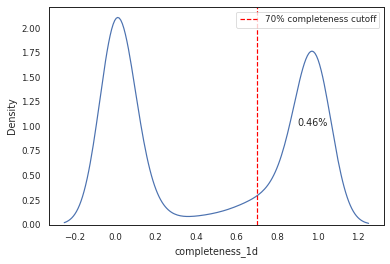

In [40]:
sns.kdeplot(data=dc_agg, x='completeness_1d')
plt.axvline(0.7, ls='--', color='red', label='70% completeness cutoff')
plt.text(0.9,1, '{:.2f}%'.format((dc_agg['completeness_1d'] >= 0.7).sum()/dc_agg['completeness_1d'].count()))
plt.legend()

<AxesSubplot:xlabel='completeness_1d', ylabel='Density'>

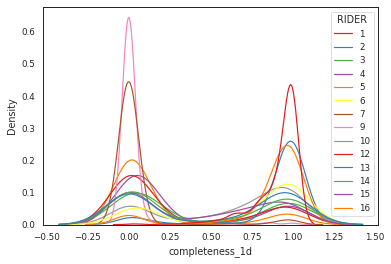

In [41]:
sns.kdeplot(data=dc_agg, x='completeness_1d', hue='RIDER', palette='Set1')

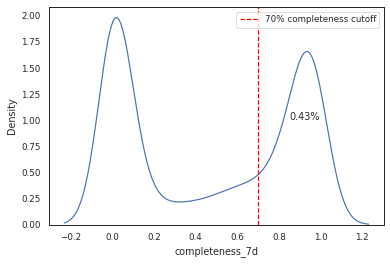

In [42]:
sns.kdeplot(data=dc_agg, x='completeness_7d')
plt.axvline(0.7, ls='--', color='red', label='70% completeness cutoff')
plt.text(0.85,1, '{:.2f}%'.format((dc_agg['completeness_7d'] >= 0.7).sum()/dc_agg['completeness_1d'].count()))
plt.legend()

Calendar with glucose availability

In [45]:
dc_avail = dc_agg['completeness_1d'].unstack()
dc_avail

date   2018-10-23  2018-10-24  2018-10-25  2018-10-26  2018-10-27  2018-10-28  \
RIDER                                                                           
1             NaN         NaN         NaN         NaN         NaN         NaN   
2             0.0         0.0         0.0         0.0         0.0         0.0   
3             NaN         NaN         NaN         NaN         NaN         NaN   
4             NaN         NaN         NaN         NaN         NaN         NaN   
5             NaN         NaN         NaN         NaN         NaN         NaN   
6             NaN         NaN         NaN         NaN         NaN         NaN   
7             NaN         NaN         NaN         NaN         NaN         NaN   
9             NaN         NaN         NaN         NaN         NaN         NaN   
10            NaN         NaN         NaN         NaN         NaN         NaN   
12            NaN         NaN         NaN         NaN         NaN         NaN   
13            NaN         NaN         NaN         NaN         NaN         NaN   
14            NaN         NaN         NaN         NaN         NaN         NaN   
15            NaN         NaN         NaN         NaN         NaN         NaN   
16            NaN         NaN         NaN         NaN         NaN         NaN   

date   2018-10-29  2018-10-30  2018-10-31  2018-11-01  ...  2019-10-27  \
RIDER                                                  ...               
1             NaN         NaN         NaN         NaN  ...         NaN   
2             0.0         0.0         0.0         0.0  ...         NaN   
3             NaN         NaN         NaN         NaN  ...         NaN   
4             NaN         NaN         NaN         NaN  ...         NaN   
5             NaN         NaN         NaN         NaN  ...         NaN   
6             NaN         NaN         NaN         NaN  ...         NaN   
7             NaN         NaN         NaN         NaN  ...    0.000000   
9             NaN         NaN         NaN         NaN  ...         NaN   
10            NaN         NaN         NaN         NaN  ...    0.000000   
12            NaN         NaN         NaN         NaN  ...    0.048611   
13            NaN         NaN         NaN         NaN  ...         NaN   
14            NaN         NaN         NaN         NaN  ...         NaN   
15            NaN         NaN         NaN         NaN  ...         NaN   
16            NaN         NaN         NaN         NaN  ...         NaN   

date   2019-10-28  2019-10-29  2019-10-30  2019-10-31  2019-11-01  2019-11-02  \
RIDER                                                                           
1             NaN         NaN         NaN         NaN         NaN         NaN   
2             NaN         NaN         NaN         NaN         NaN         NaN   
3             NaN         NaN         NaN         NaN         NaN         NaN   
4             NaN         NaN         NaN         NaN         NaN         NaN   
5             NaN         NaN         NaN         NaN         NaN         NaN   
6             NaN         NaN         NaN         NaN         NaN         NaN   
7             NaN         NaN         NaN         NaN         NaN         NaN   
9             NaN         NaN         NaN         NaN         NaN         NaN   
10            0.0         NaN         NaN         NaN         NaN         NaN   
12            1.0    0.965278    0.201389         1.0         1.0         1.0   
13            NaN         NaN         NaN         NaN         NaN         NaN   
14            NaN         NaN         NaN         NaN         NaN         NaN   
15            NaN         NaN         NaN         NaN         NaN         NaN   
16            NaN         NaN         NaN         NaN         NaN         NaN   

date   2019-11-03  2019-11-04  2019-11-05  
RIDER                                      
1             NaN         NaN         NaN  
2             NaN         NaN         NaN  
3             NaN         NaN         NaN  
4

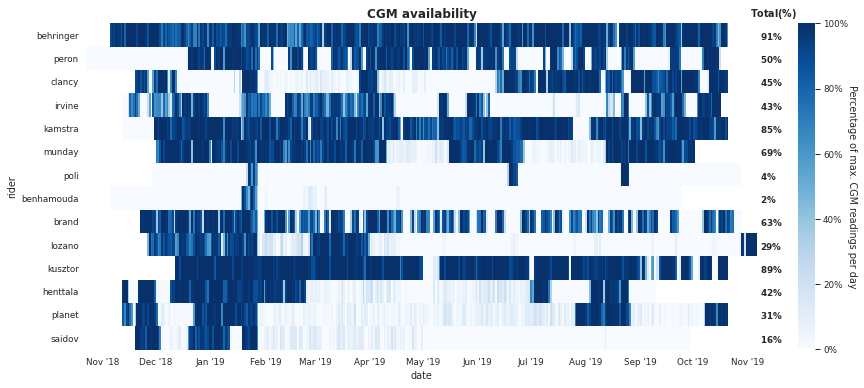

In [47]:
ax = plot_availability(dc_avail)
plt.title('CGM availability', fontweight='bold', fontsize=12)
savefig('availability/glucose_availability', yticks=ax)

Select data with glucose completeness >= 70%

In [48]:
cols_completeness = dc_agg.columns[~dc_agg.columns.str.startswith('completeness')]
dc_agg.loc[dc_agg['completeness_1d'] < 0.7, cols_completeness] = np.nan

In [49]:
dc = pd.merge(dc, dc_agg['completeness_1d'].reset_index(), on=['RIDER', 'date'], how='left')

In [50]:
dc.loc[dc['completeness_1d'] < 0.7, 'Glucose Value (mg/dL)'] = np.nan

**TODO**: check why!!!

In [51]:
dc[(dc.timestamp.diff() != '5min') & (dc.RIDER.diff() != 1)]

RIDER           timestamp  Glucose Value (mg/dL)     local_timestamp  \
0           1 2018-11-04 23:00:00                  189.0 2018-11-05 00:00:00   
156372      2 2019-05-04 00:00:00                   39.6 2019-05-03 17:00:00   
156456      2 2019-05-03 22:00:00                    NaN 2019-05-04 00:00:00   
156480      2 2019-05-04 07:00:00                    NaN 2019-05-04 00:00:00   
680784      9 2018-11-04 23:00:00                    NaN 2018-11-05 00:00:00   
871992     12 2018-11-25 16:00:00                    NaN 2018-11-26 00:00:00   
920448     12 2019-05-12 23:00:00                    NaN 2019-05-12 16:00:00   
920544     12 2019-05-12 22:00:00                    NaN 2019-05-13 00:00:00   
920556     12 2019-05-13 07:00:00                    NaN 2019-05-13 00:00:00   
968760     12 2019-10-27 21:50:00                    NaN 2019-10-27 22:50:00   
968774     12 2019-10-27 16:00:00                    NaN 2019-10-28 00:00:00   
968844     12 2019-10-27 23:00:00                  100.8 2019-10-28 00:00:00   
971436     12 2019-11-06 00:00:00                   81.0 2019-11-05 18:00:00   

        exercise  recovery   wake  sleep   race  travel       date  \
0          False     False  False   True  False   False 2018-11-05   
156372     False     False   True  False  False   False 2019-05-03   
156456     False     False  False   True  False    True 2019-05-04   
156480     False     False  False   True  False    True 2019-05-04   
680784     False     False  False   True  False   False 2018-11-05   
871992     False     False  False   True  False   False 2018-11-26   
920448      True     False   True  False   True   False 2019-05-12   
920544      True     False  False   True   True   False 2019-05-13   
920556     False     False  False   True   True   False 2019-05-13   
968760     False     False   True  False  False    True 2019-10-27   
968774     False     False  False   True  False    True 2019-10-28   
968844     False     False  False   True  False    True 2019-10-28   
971436     False     False   True  False  False   False 2019-11-05   

        completeness_1d  
0              0.920139  
156372         0.996528  
156456         0.555556  
156480         0.555556  
680784         0.000000  
871992         0.472222  
920448         0.034722  
920544         0.052083  
920556         0.052083  
968760         0.048611  
968774         1.000000  
968844         1.000000  
971436         1.000000

In [52]:
dc.loc[156370:156375]

RIDER           timestamp  Glucose Value (mg/dL)     local_timestamp  \
156370      2 2019-05-03 21:50:00                  230.4 2019-05-03 23:50:00   
156371      2 2019-05-03 21:55:00                  232.2 2019-05-03 23:55:00   
156372      2 2019-05-04 00:00:00                   39.6 2019-05-03 17:00:00   
156373      2 2019-05-04 00:05:00                   46.8 2019-05-03 17:05:00   
156374      2 2019-05-04 00:10:00                   48.6 2019-05-03 17:10:00   
156375      2 2019-05-04 00:15:00                   50.4 2019-05-03 17:15:00   

        exercise  recovery  wake  sleep   race  travel       date  \
156370     False     False  True  False  False   False 2019-05-03   
156371     False     False  True  False  False   False 2019-05-03   
156372     False     False  True  False  False   False 2019-05-03   
156373     False     False  True  False  False   False 2019-05-03   
156374     False     False  True  False  False   False 2019-05-03   
156375     False     False  True  False  False   False 2019-05-03   

        completeness_1d  
156370         0.996528  
156371         0.996528  
156372         0.996528  
156373         0.996528  
156374         0.996528  
156375         0.996528

Remove nans from dexcom data

In [53]:
dc = dc.dropna(subset=['Glucose Value (mg/dL)'])

In [54]:
print("Data available: ")
print("TrainingPeaks: N =", len(tp_agg.RIDER.unique()), "; D =", len(tp_agg))
print("Dexcom: N =", len(dc.RIDER.unique()), "; D =", len(dc[['RIDER', 'date']].drop_duplicates()))

Data available: 
TrainingPeaks: N = 14 ; D = 4647
Dexcom: N = 14 ; D = 2120


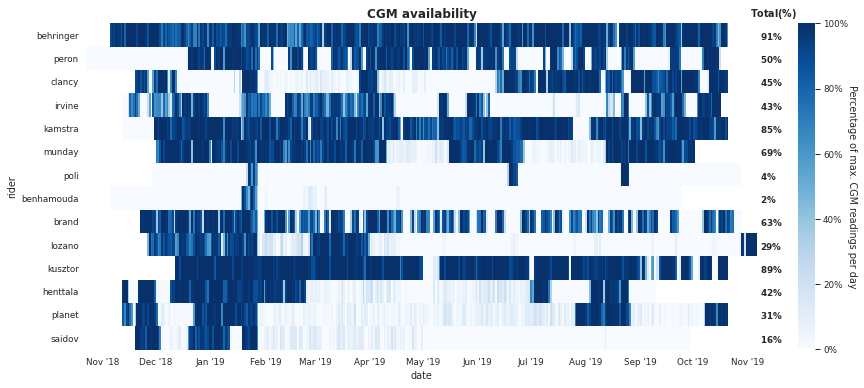

In [55]:
#### TODO!!!!!!!!!!!! why do we still see days with not so much cgm??
ax = plot_availability(dc_avail)
plt.title('CGM availability', fontweight='bold', fontsize=12)
savefig('availability/glucose_availability_selectcomp', yticks=ax)

## Descriptives Dexcom

In [56]:
COL = 'Glucose Value (mg/dL)'

In [57]:
SECTIONS = ('wake', 'exercise', 'recovery', 'sleep')

### Glucose distribution (histograms)

In [58]:
def plot_hist_glucose_settings(ax, ax0, col='Glucose Value (mg/dL)', xlim=(20,410), ylabel='Probability', loc_legend=(1., 0.96)):
	ax.set_xlim((20, 410))
	ax.set_xlabel(col)
	ax.xaxis.set_visible(True)
	ax.set_ylabel(ylabel)
	ax.yaxis.set_ticks_position('left')
	ax.yaxis.set_label_position('left')
	ax0.yaxis.set_visible(False)
	ax0.set_ylabel('')
	plt.legend(loc='upper right', bbox_to_anchor=loc_legend, prop={'family': 'DejaVu Sans Mono', 'size':8})

All data

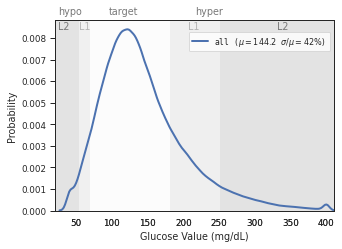

In [59]:
fig, ax0 = plt.subplots(figsize=(5, 3.5))
ax0 = plot_glucose_levels(ax0, color=False)
ax = ax0.twinx()
sns.kdeplot(dc[COL], ax=ax, linewidth=2,
	label=r'all ($\mu = {:.1f}$ $\sigma/\mu = {:.0f}\%$)'\
	.format(dc[COL].mean(), dc[COL].std()/dc[COL].mean()*100))
plot_hist_glucose_settings(ax, ax0, COL)
ax.set_xlabel(COL)
savefig(path='hist/hist_glucose')

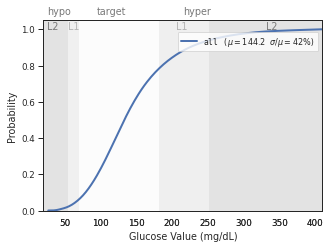

In [60]:
fig, ax0 = plt.subplots(figsize=(5, 3.5))
ax0 = plot_glucose_levels(ax0, color=False)
ax = ax0.twinx()
sns.kdeplot(dc[COL], ax=ax, cumulative=True, linewidth=2,
	label=r'all ($\mu = {:.1f}$ $\sigma/\mu = {:.0f}\%$)'\
	.format(dc[COL].mean(), dc[COL].std()/dc[COL].mean()*100))
plot_hist_glucose_settings(ax, ax0, COL)
ax.set_xlabel(COL)
savefig(path='cdf/cdf_glucose')

All, hue: sections

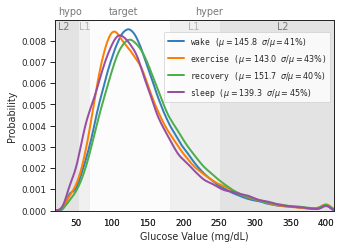

In [61]:
fig, ax0 = plt.subplots(figsize=(5, 3.5))
ax0 = plot_glucose_levels(ax0, color=False)
ax = ax0.twinx()
for k, sec in enumerate(SECTIONS):
	sns.kdeplot(dc[dc[sec]][COL], ax=ax, linewidth=2, color=color_sec[sec],
		label=sec+r' ($\mu = {:.1f}$ $\sigma/\mu = {:.0f}\%$)'.format(dc[dc[sec]][COL].mean(), dc[dc[sec]][COL].std()/dc[dc[sec]][COL].mean()*100))
plot_hist_glucose_settings(ax, ax0, COL)
savefig(path='hist/hist_glucose_sec')

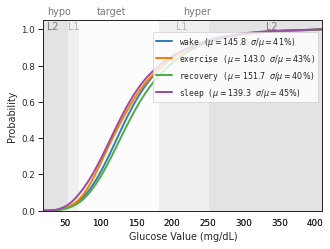

In [62]:
fig, ax0 = plt.subplots(figsize=(5, 3.5))
ax0 = plot_glucose_levels(ax0, color=False)
ax = ax0.twinx()
for k, sec in enumerate(SECTIONS):
	sns.kdeplot(dc[dc[sec]][COL], ax=ax, cumulative=True, linewidth=2, color=color_sec[sec],
		label=sec+r' ($\mu = {:.1f}$ $\sigma/\mu = {:.0f}\%$)'.format(dc[dc[sec]][COL].mean(), dc[dc[sec]][COL].std()/dc[dc[sec]][COL].mean()*100))
plot_hist_glucose_settings(ax, ax0, COL)
savefig(path='cdf/cdf_glucose_sec')

Individual athletes, hue: sections

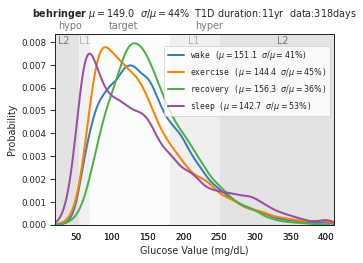

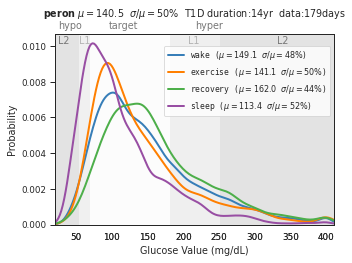

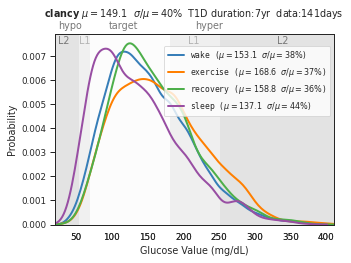

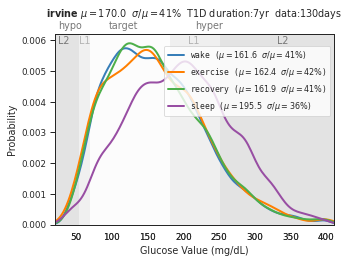

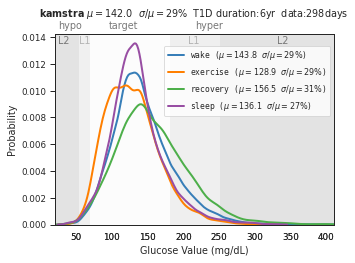

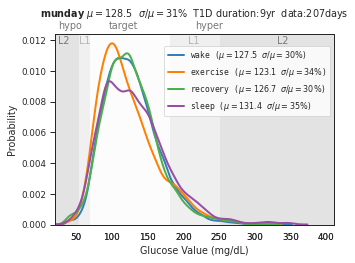

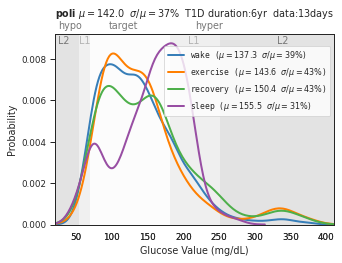

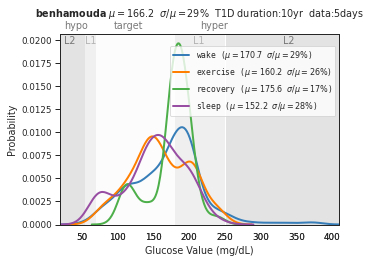

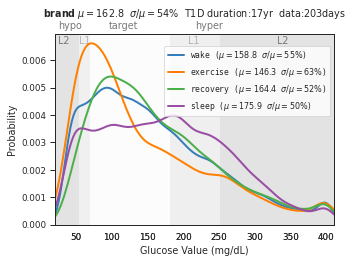

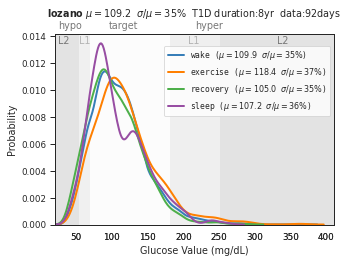

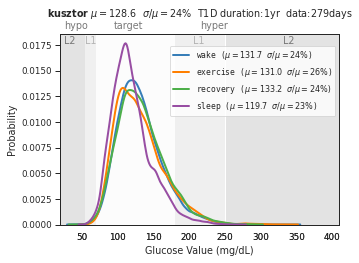

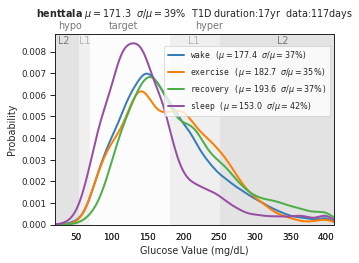

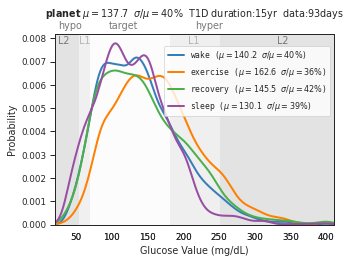

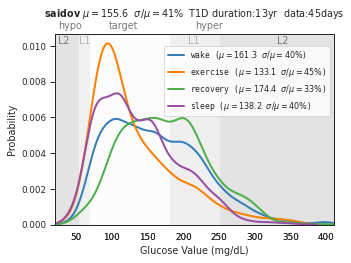

In [63]:
for i in ATHLETES:
	fig, ax0 = plt.subplots(figsize=(5, 3.5))
	ax0 = plot_glucose_levels(ax0, color=False)
	ax = ax0.twinx()
	
	for k, sec in enumerate(SECTIONS):
		sns.kdeplot(dc.loc[dc[sec] & (dc.RIDER == i), COL], ax=ax, linewidth=2, color=color_sec[sec],
			label=sec+r' ($\mu = {:.1f}$ $\sigma/\mu = {:.0f}\%$)'\
			.format(dc.loc[dc[sec] & (dc.RIDER == i), COL].mean(), 
					dc.loc[dc[sec] & (dc.RIDER == i), COL].std()/dc.loc[dc[sec] & (dc.RIDER == i), COL].mean()*100))
	plot_hist_glucose_settings(ax, ax0, COL)
	title = r'$\mu = {:.1f}$  $\sigma/\mu = {:.0f}\%$  T1D duration:{:.0f}yr  data:{:.0f}days'\
		.format(dc[dc.RIDER == i][COL].mean(),
				dc[dc.RIDER == i][COL].std()/dc[dc.RIDER == i][COL].mean()*100,
				info.loc[i, 'diabetes_duration'],
				len(dc_agg[dc_agg['completeness_1d'] >= 0.7].loc[i]))
	savefig(path='hist/hist_glucose_rider', i=i, title=title, y=1.06)

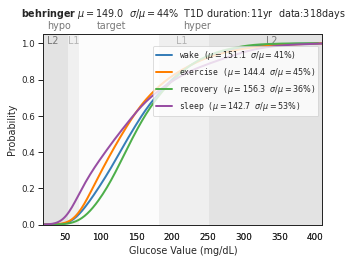

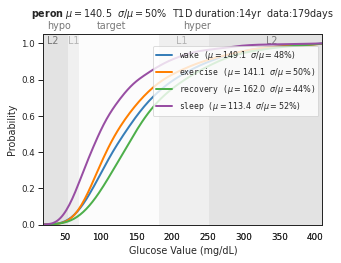

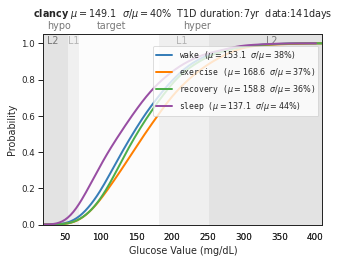

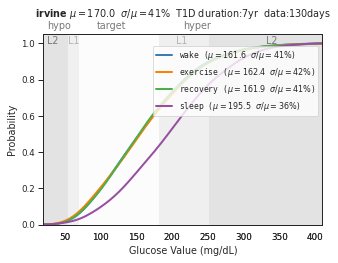

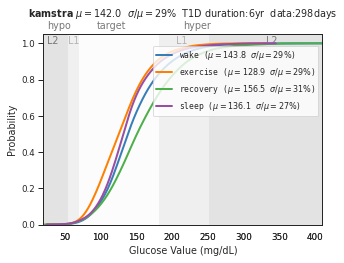

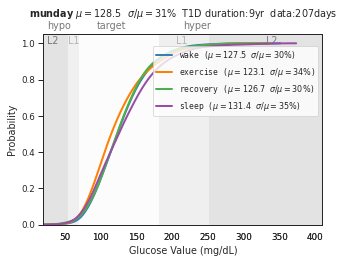

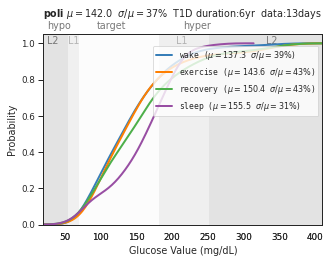

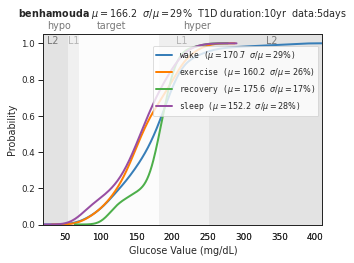

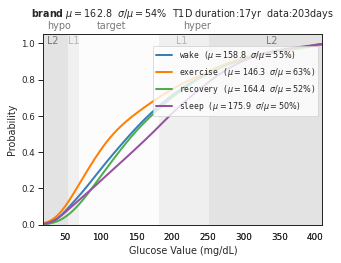

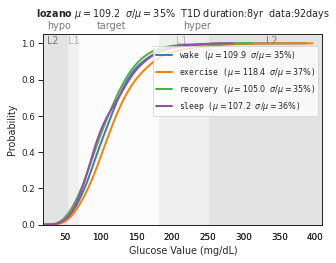

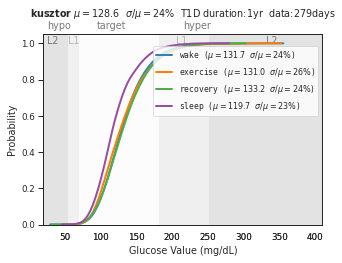

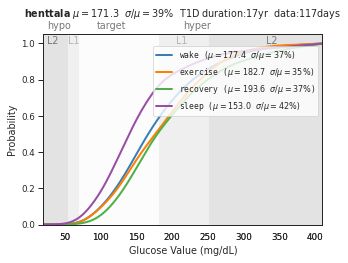

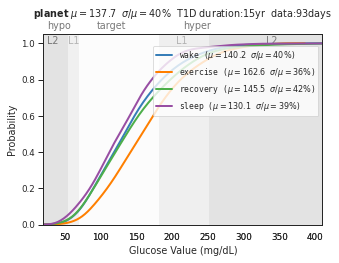

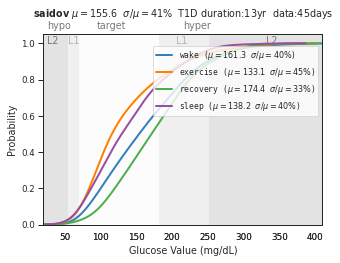

In [64]:
for i in ATHLETES:
	fig, ax0 = plt.subplots(figsize=(5, 3.5))
	ax0 = plot_glucose_levels(ax0, color=False)
	ax = ax0.twinx()
	
	for k, sec in enumerate(SECTIONS):
		sns.kdeplot(dc.loc[dc[sec] & (dc.RIDER == i), COL], ax=ax, cumulative=True, 
			linewidth=2, color=color_sec[sec],
			label=sec+r' ($\mu = {:.1f}$ $\sigma/\mu = {:.0f}\%$)'\
			.format(dc.loc[dc[sec] & (dc.RIDER == i), COL].mean(), 
					dc.loc[dc[sec] & (dc.RIDER == i), COL].std()/dc.loc[dc[sec] & (dc.RIDER == i), COL].mean()*100))
	plot_hist_glucose_settings(ax, ax0, COL)
	title = r'$\mu = {:.1f}$  $\sigma/\mu = {:.0f}\%$  T1D duration:{:.0f}yr  data:{:.0f}days'\
		.format(dc[dc.RIDER == i][COL].mean(),
				dc[dc.RIDER == i][COL].std()/dc[dc.RIDER == i][COL].mean()*100,
				info.loc[i, 'diabetes_duration'],
				len(dc_agg[dc_agg['completeness_1d'] >= 0.7].loc[i]))
	savefig(path='cdf/cdf_glucose_rider', i=i, title=title, y=1.06)

All, hue: athletes

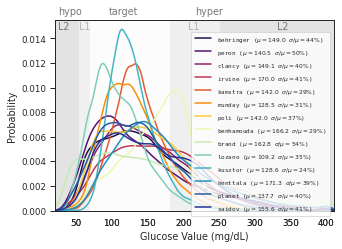

In [65]:
fig, ax0 = plt.subplots(figsize=(5, 3.5))
ax0 = plot_glucose_levels(ax0, color=False)
ax = ax0.twinx()
for c, i in enumerate(ATHLETES):
	sns.kdeplot(dc[dc.RIDER == i][COL], ax=ax, 
		linewidth=1.5, color=palette_ath[c], alpha=.8,
		label=str(i)+r' ($\mu = {:.1f}$ $\sigma/\mu = {:.0f}\%$)'\
		.format(dc[dc.RIDER == i][COL].mean(), 
				dc[dc.RIDER == i][COL].std()/dc[dc.RIDER == i][COL].mean()*100))
plot_hist_glucose_settings(ax, ax0, COL)
savefig(path='hist/hist_glucose_riders', legend=ax.get_legend().get_texts())

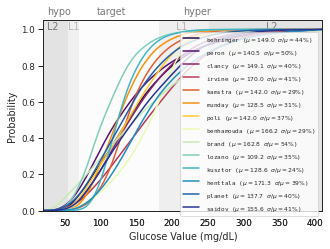

In [66]:
fig, ax0 = plt.subplots(figsize=(5, 3.5))
ax0 = plot_glucose_levels(ax0, color=False)
ax = ax0.twinx()
for c, i in enumerate(ATHLETES):
	sns.kdeplot(dc[dc.RIDER == i][COL], ax=ax, cumulative=True,
		linewidth=1.5, color=palette_ath[c], alpha=.8,
		label=str(i)+r' ($\mu = {:.1f}$ $\sigma/\mu = {:.0f}\%$)'\
		.format(dc[dc.RIDER == i][COL].mean(), 
				dc[dc.RIDER == i][COL].std()/dc[dc.RIDER == i][COL].mean()*100))
plot_hist_glucose_settings(ax, ax0, COL)
savefig(path='cdf/cdf_glucose_riders', legend=ax.get_legend().get_texts())

Sections individually, hue: athletes

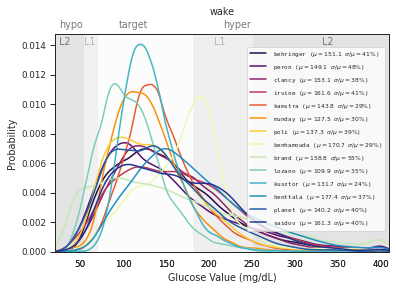

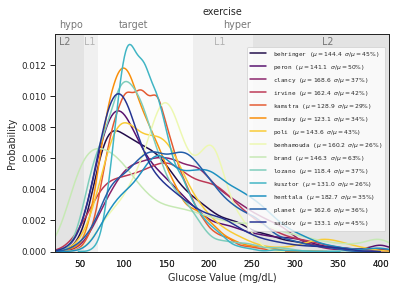

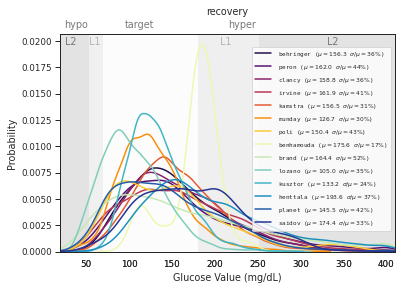

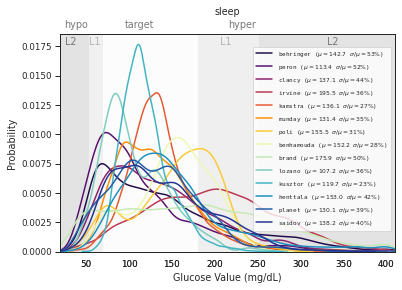

In [67]:
for k, sec in enumerate(SECTIONS):
	fig, ax0 = plt.subplots()
	ax0 = plot_glucose_levels(ax0, color=False)
	ax = ax0.twinx()
	for c, i in enumerate(ATHLETES):
		sns.kdeplot(dc.loc[dc[sec] & (dc.RIDER == i), COL], ax=ax, 
			linewidth=1.5, color=palette_ath[c], alpha=.8,
			label=str(i)+r' ($\mu = {:.1f}$ $\sigma/\mu = {:.0f}\%$)'\
			.format(dc.loc[dc[sec] & (dc.RIDER == i), COL].mean(), 
					dc.loc[dc[sec] & (dc.RIDER == i), COL].std()/dc.loc[dc[sec] & (dc.RIDER == i), COL].mean()*100))
	plot_hist_glucose_settings(ax, ax0, COL)
	plt.title(sec, y=1.06)
	savefig(path='hist/hist_glucose_sec', i=sec, legend=ax.get_legend().get_texts())

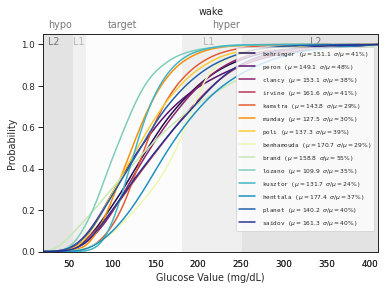

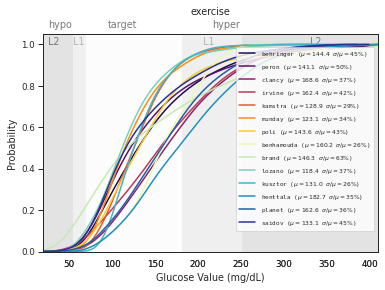

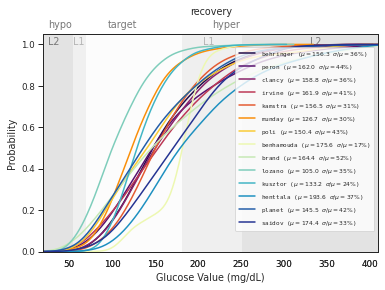

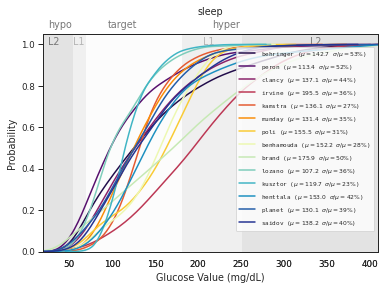

In [68]:
for k, sec in enumerate(SECTIONS):
	fig, ax0 = plt.subplots()
	ax0 = plot_glucose_levels(ax0, color=False)
	ax = ax0.twinx()
	for c, i in enumerate(ATHLETES):
		sns.kdeplot(dc.loc[dc[sec] & (dc.RIDER == i), COL], ax=ax, 
			cumulative=True, linewidth=1.5, color=palette_ath[c], alpha=.8,
			label=str(i)+r' ($\mu = {:.1f}$ $\sigma/\mu = {:.0f}\%$)'\
			.format(dc.loc[dc[sec] & (dc.RIDER == i), COL].mean(), 
					dc.loc[dc[sec] & (dc.RIDER == i), COL].std()/dc.loc[dc[sec] & (dc.RIDER == i), COL].mean()*100))
	plot_hist_glucose_settings(ax, ax0, COL)
	plt.title(sec, y=1.06)
	savefig(path='cdf/cdf_glucose_sec', i=sec, legend=ax.get_legend().get_texts())

## Glucose time in level (barcharts)

In [69]:
def get_percinlevel(dc, col='Glucose Value (mg/dL)'):
	return {level: ((dc[col] >= lmin) & (dc[col] <= lmax)).sum() / len(dc)*100 for level, (lmin, lmax) in glucose_levels.items()}

In [70]:
def plot_bar(data, x, width=.8, colors=dict(h_neg=10, h_pos=10, s=0, l=50)):
	hatch = ('\\\\', '\\\\', None, '//', '//')
	color_palette = sns.diverging_palette(**colors, n=5)
	bottom = 0
	for sec, (label, y) in enumerate(data.items()):
		plt.bar(x=x, height=y, width=width, bottom=bottom, color=color_palette[sec], hatch=hatch[sec])
		bottom += y

In [71]:
legend_elements = [Patch(facecolor=c, edgecolor='white', hatch=h, label=l) \
					for c, l, h in zip(sns.diverging_palette(10, 10, s=0, n=5), 
									   list(glucose_levels.keys())[::-1], 
									   ('///', '///', None, '\\\\\\', '\\\\\\'))] 

colors = [dict(zip(['h_neg', 'h_pos', 'l', 's'], [c[0]*360, c[0]*360, c[1]*100, c[2]*100])) \
			for c in [rgb_to_hls(*j) for j in color_sec.values()]]

All, hue: stages

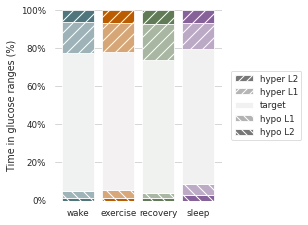

In [72]:
# TODO: now it is dominated by athletes that have the most data, 
# we should calculate it for riders individually and then average
fig, ax = plt.subplots(figsize=(3, 3.5))
for k, sec in enumerate(SECTIONS):
	pil = get_percinlevel(dc[dc[sec]])
	plot_bar(pil, x=k, colors=colors[k])

plt.yticks(np.arange(0, 101, 20), ['{}%'.format(j) for j in np.arange(0, 101, 20)])
plt.xticks(np.arange(len(SECTIONS)), SECTIONS)
plt.ylim((0,100))
plt.ylabel('Time in glucose ranges (%)')

ax.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.5, 0.5))
ax.yaxis.grid(True)
sns.despine(left=True, bottom=True, right=True)
savefig('time_in_zone/time_in_glucoselevel')

Individual athletes, hue: stages

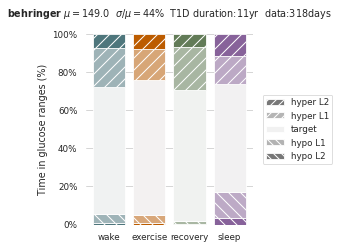

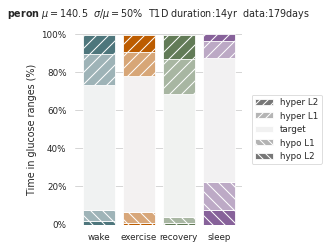

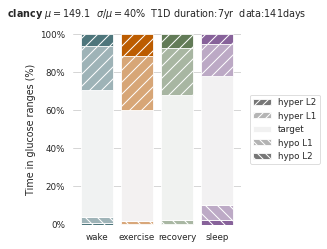

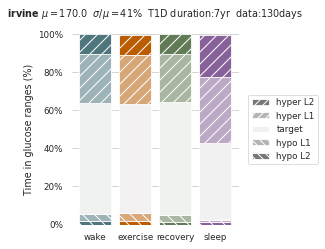

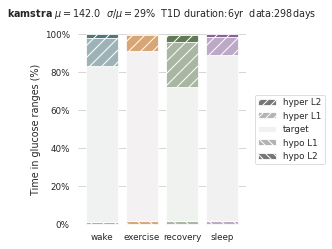

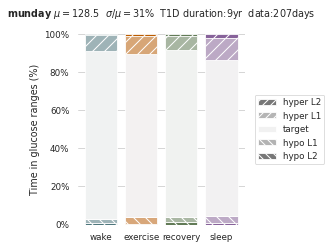

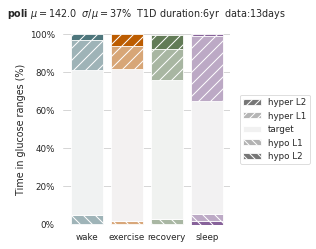

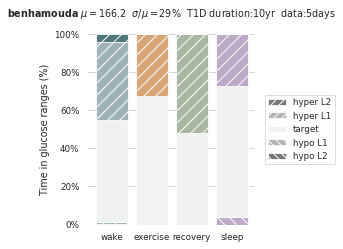

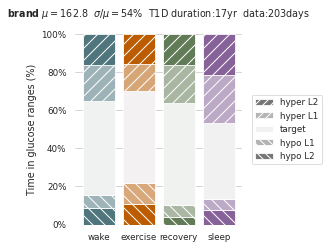

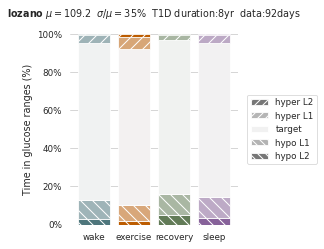

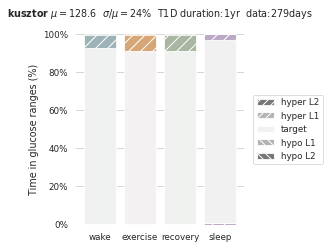

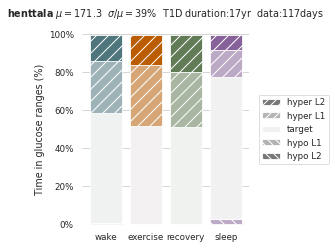

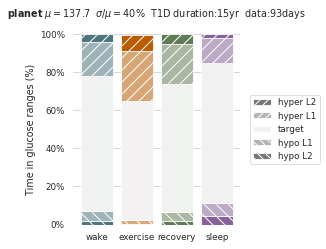

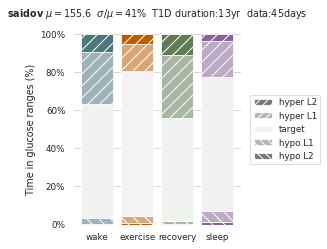

In [73]:
# TODO: check if calculation of perc_in_level is now correct!! (irvine looks weird!)
for i in ATHLETES:
	fig, ax = plt.subplots(figsize=(3, 3.5))
	for k, sec in enumerate(SECTIONS):
		pil = get_percinlevel(dc[dc[sec] & (dc.RIDER == i)])
		plot_bar(pil, x=k, colors=colors[k])

	plt.yticks(np.arange(0, 101, 20), ['{}%'.format(j) for j in np.arange(0, 101, 20)])
	plt.xticks(np.arange(len(SECTIONS)), SECTIONS)
	plt.ylim((0,100))
	plt.ylabel('Time in glucose ranges (%)')

	ax.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.5, 0.5))
	ax.yaxis.grid(True)
	sns.despine(left=True, bottom=True, right=True)
    
	title = r'$\mu = {:.1f}$  $\sigma/\mu = {:.0f}\%$  T1D duration:{:.0f}yr  data:{:.0f}days'\
		.format(dc[dc.RIDER == i][COL].mean(),
				dc[dc.RIDER == i][COL].std()/dc[dc.RIDER == i][COL].mean()*100,
				info.loc[i, 'diabetes_duration'],
				len(dc_agg[dc_agg['completeness_1d'] >= 0.7].loc[i]))
	savefig(path='time_in_zone/time_in_glucoselevel', i=i, title=title, y=1.06)

All, hue: athletes

In [74]:
colors = colors = [dict(zip(['h_neg', 'h_pos', 'l', 's'], [c[0]*360, c[0]*360, c[1]*100, c[2]*100])) \
			for c in [rgb_to_hls(*j) for j in palette_ath]]

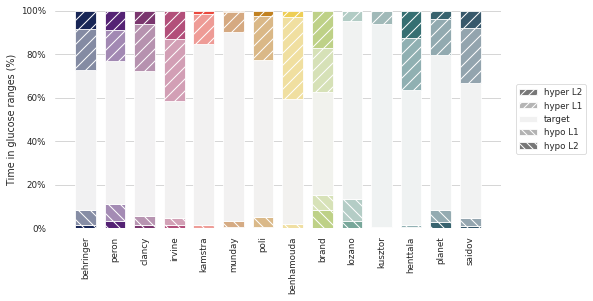

In [75]:
fig, ax = plt.subplots(figsize=(8,4))
for n, i in enumerate(ATHLETES):
	pil = get_percinlevel(dc[dc.RIDER == i])
	plot_bar(pil, x=n, width=.7, colors=colors[n])

plt.yticks(np.arange(0, 101, 20), ['{}%'.format(j) for j in np.arange(0, 101, 20)])
plt.xticks(np.arange(len(ATHLETES)), ATHLETES)
plt.ylim((0,100))
plt.ylabel('Time in glucose ranges (%)')

ax.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.2, 0.5))
ax.yaxis.grid(True)
sns.despine(left=True, bottom=True, right=True)

savefig('time_in_zone/time_in_glucoselevel_riders', xticks=ax)

In [76]:
# race vs no race
colors = [dict(zip(['h_neg', 'h_pos', 'l', 's'], [c[0]*360, c[0]*360, c[1]*100, c[2]*100])) \
			for c in [rgb_to_hls(*j) for j in color_race.values()]]

All, hue: race

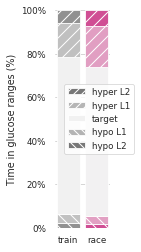

In [77]:
fig, ax = plt.subplots(figsize=(1,4))
for k, b in enumerate([False, True]):
	pil = get_percinlevel(dc[dc['race'] == b])
	plot_bar(pil, x=k, colors=colors[k])

plt.yticks(np.arange(0, 101, 20), ['{}%'.format(j) for j in np.arange(0, 101, 20)])
plt.xticks(np.arange(2), [j for j in color_race.keys()])
plt.ylim((0,100))
plt.ylabel('Time in glucose ranges (%)')

ax.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.5, 0.5))
ax.yaxis.grid(True)
sns.despine(left=True, bottom=True, right=True)

savefig('time_in_zone/time_in_glucoselevel_race')

Individual athletes, hue: race

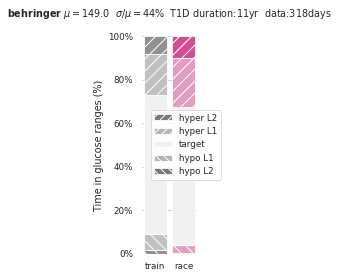

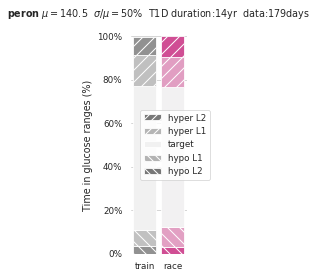

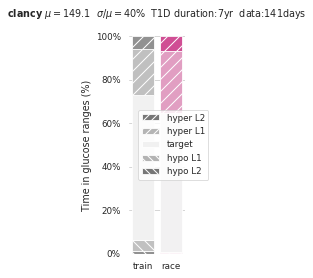

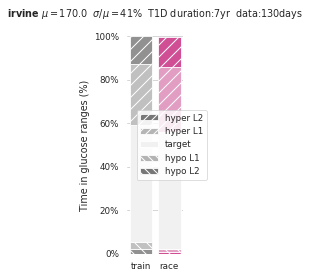

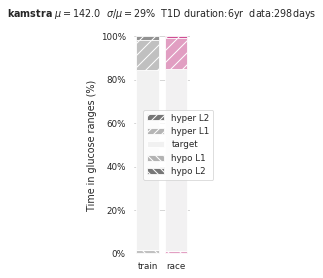

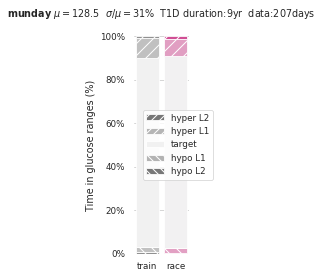

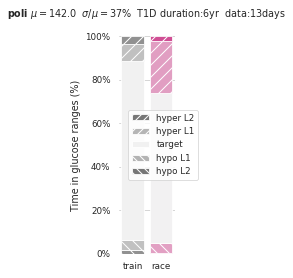

/local/home/evanweenen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/local/home/evanweenen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/local/home/evanweenen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/local/home/evanweenen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/local/home/evanweenen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


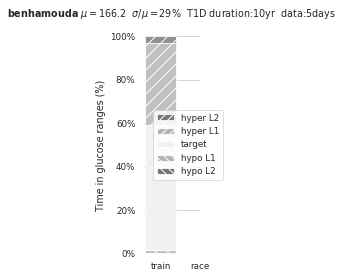

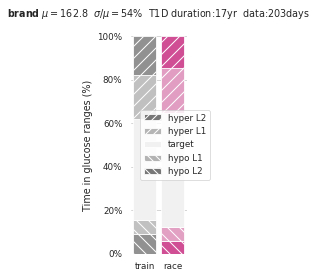

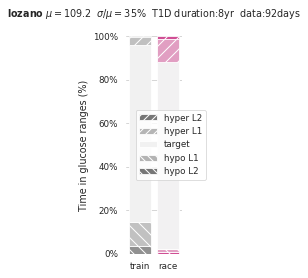

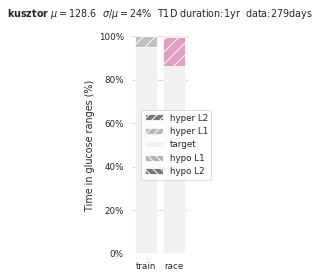

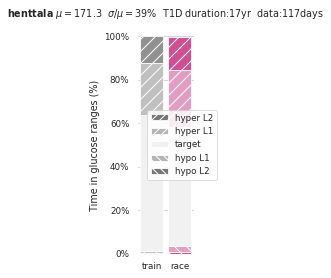

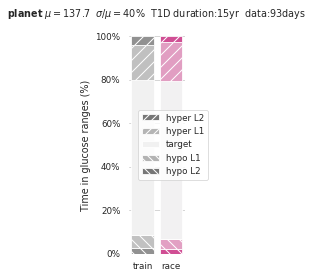

/local/home/evanweenen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/local/home/evanweenen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/local/home/evanweenen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/local/home/evanweenen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/local/home/evanweenen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


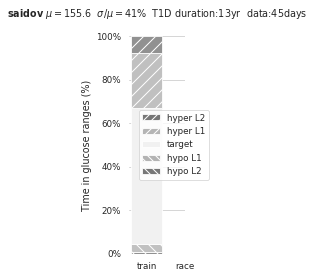

In [78]:
for i in ATHLETES:
	fig, ax = plt.subplots(figsize=(1,4))
	for k, b in enumerate([False, True]):
		pil = get_percinlevel(dc[(dc.RIDER == i) & (dc['race'] == b)])
		plot_bar(pil, x=k, colors=colors[k])

	plt.yticks(np.arange(0, 101, 20), ['{}%'.format(j) for j in np.arange(0, 101, 20)])
	plt.xticks(np.arange(2), [j for j in color_race.keys()])
	plt.ylim((0,100))
	plt.ylabel('Time in glucose ranges (%)')

	ax.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.5, 0.5))
	ax.yaxis.grid(True)
	sns.despine(left=True, bottom=True, right=True)

	title = r'$\mu = {:.1f}$  $\sigma/\mu = {:.0f}\%$  T1D duration:{:.0f}yr  data:{:.0f}days'\
		.format(dc[dc.RIDER == i][COL].mean(),
				dc[dc.RIDER == i][COL].std()/dc[dc.RIDER == i][COL].mean()*100,
				info.loc[i, 'diabetes_duration'],
				len(dc_agg[dc_agg['completeness_1d'] >= 0.7].loc[i]))
	savefig(path='time_in_zone/time_in_glucoselevel_race', i=i, title=title, y=1.06)

## Glucose distribution (boxplots)

In [79]:
kws_box = {'race':	dict(boxprops=dict(color='w', facecolor=color_race['race'], hatch='\\\\\\'),
						 medianprops=dict(color='w', linewidth=2),
						 whiskerprops=dict(color=color_race['race']), capprops=dict(color=color_race['race'])),
		   'train':dict(boxprops=dict(color='w', facecolor=color_race['train'], hatch='///'),
						 medianprops=dict(color='w', linewidth=2),
						 whiskerprops=dict(color=color_race['train']), capprops=dict(color=color_race['train']))}

All, stratify: sections

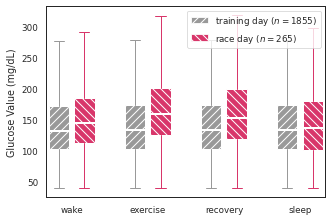

In [80]:
n_nc = len(dc.loc[dc['race'] == False, ['RIDER', 'date']].drop_duplicates())
n_rc = len(dc.loc[dc['race'] == True, ['RIDER', 'date']].drop_duplicates())

fig, ax = plt.subplots(figsize=(5,3.5))
for k, sec in enumerate(SECTIONS):
	plt.boxplot(dc.loc[dc[sec] & dc['race']==False, COL], positions=[k+0.5+k*2], widths=[0.8],
		patch_artist=True, showfliers=False, **kws_box['train'])
	plt.boxplot(dc.loc[dc[sec] & dc['race']==True, COL], positions=[k+1.5+k*2], widths=[0.8],
		patch_artist=True, showfliers=False, **kws_box['race'])
plt.xticks([1,4,7,10], SECTIONS)
plt.ylabel(COL)
plt.legend(handles=[Patch(facecolor=color_race['train'], edgecolor='white', hatch='///', label='training day'+r' ($n = {:.0f}$)'.format(n_nc)),
					Patch(facecolor=color_race['race'], edgecolor='white', hatch='\\\\\\', label='race day'r' ($n = {:.0f}$)'.format(n_rc))], 
			loc='upper right')
savefig('boxplot/box_glucose_sections')

Individual athletes, stratify: sections

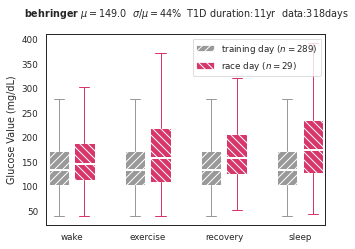

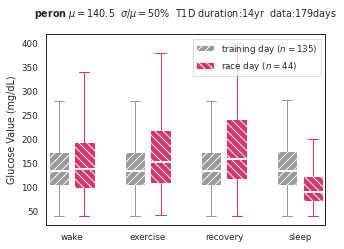

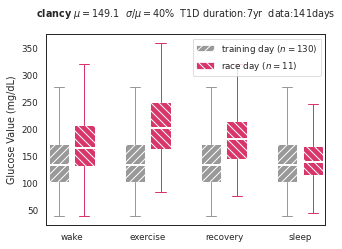

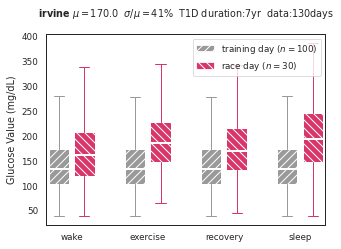

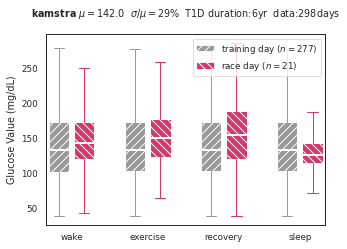

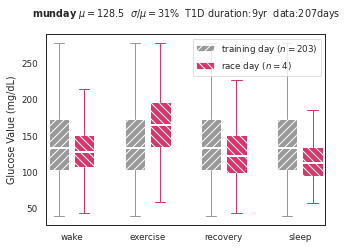

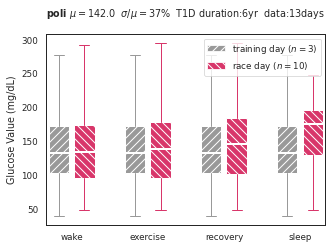

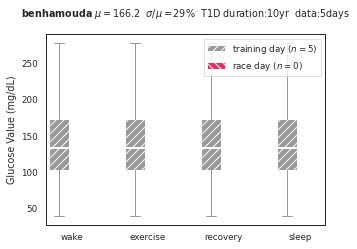

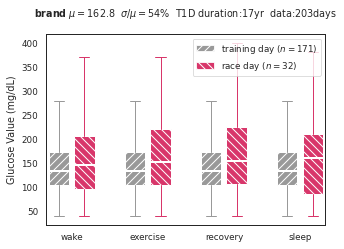

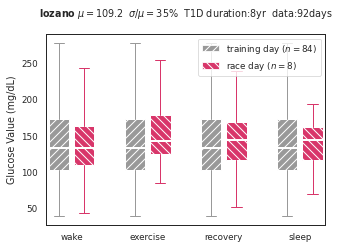

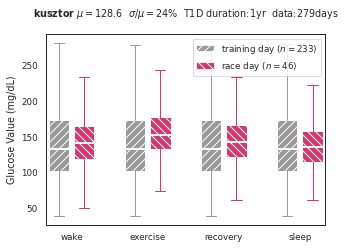

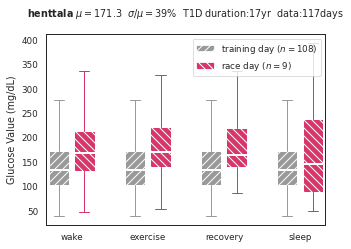

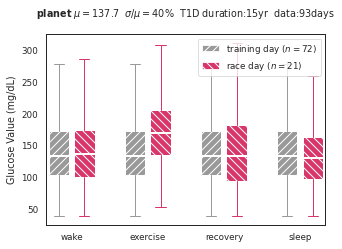

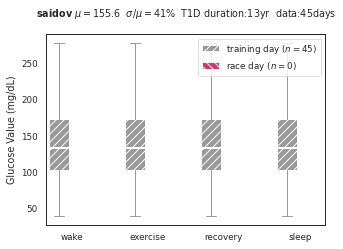

In [81]:
for i in ATHLETES:
	n_nc = len(dc.loc[(dc.RIDER == i) & (dc['race'] == False), 'local_timestamp'].dt.date.unique())
	n_rc = len(dc.loc[(dc.RIDER == i) & (dc['race'] == True), 'local_timestamp'].dt.date.unique())

	fig, ax = plt.subplots(figsize=(5,3.5))
	for k, sec in enumerate(SECTIONS):
		plt.boxplot(dc.loc[(dc.RIDER == i) & dc[sec] & dc['race']==False, COL], positions=[k+0.5+k*2], widths=[0.8],
			patch_artist=True, showfliers=False, **kws_box['train'])
		plt.boxplot(dc.loc[(dc.RIDER == i) & dc[sec] & dc['race']==True, COL], positions=[k+1.5+k*2], widths=[0.8],
			patch_artist=True, showfliers=False, **kws_box['race'])
	plt.xticks([1,4,7,10], SECTIONS)
	plt.ylabel(COL)
	plt.legend(handles=[Patch(facecolor=color_race['train'], edgecolor='white', hatch='///', label='training day'+r' ($n = {:.0f}$)'.format(n_nc)),
						Patch(facecolor=color_race['race'], edgecolor='white', hatch='\\\\\\', label='race day'r' ($n = {:.0f}$)'.format(n_rc))], 
				loc='upper right')

	title = r'$\mu = {:.1f}$  $\sigma/\mu = {:.0f}\%$  T1D duration:{:.0f}yr  data:{:.0f}days'\
		.format(dc[dc.RIDER == i][COL].mean(),
				dc[dc.RIDER == i][COL].std()/dc[dc.RIDER == i][COL].mean()*100,
				info.loc[i, 'diabetes_duration'],
				len(dc_agg[dc_agg['completeness_1d'] >= 0.7].loc[i]))
	savefig(path='boxplot/box_glucose_sections', i=i, title=title, y=1.06)

All, stratify: athletes

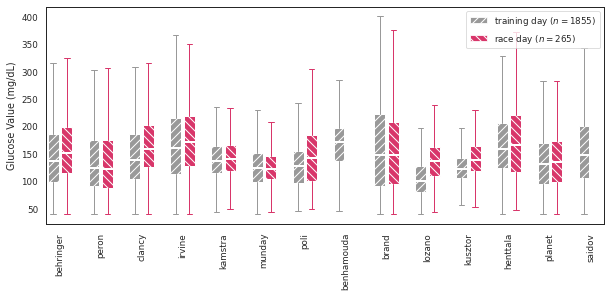

In [82]:
n_nc = len(dc.loc[dc['race'] == False, ['RIDER', 'date']].drop_duplicates())
n_rc = len(dc.loc[dc['race'] == True, ['RIDER', 'date']].drop_duplicates())

# hue: athlete
fig, ax = plt.subplots(figsize=(10,4))
for n, i in enumerate(ATHLETES):
	plt.boxplot(dc.loc[(dc.RIDER == i) & (dc['race'] == False), COL], positions=[n+0.5+n*2], widths=[0.8],
		patch_artist=True, showfliers=False, **kws_box['train'])
	plt.boxplot(dc.loc[(dc.RIDER == i) & (dc['race'] == True), COL], positions=[n+1.5+n*2], widths=[0.8],
		patch_artist=True, showfliers=False, **kws_box['race'])
plt.ylabel(COL)
plt.legend(handles=[Patch(facecolor=color_race['train'], edgecolor='white', hatch='///', label='training day'+r' ($n = {:.0f}$)'.format(n_nc)),
					Patch(facecolor=color_race['race'], edgecolor='white', hatch='\\\\\\', label='race day'r' ($n = {:.0f}$)'.format(n_rc))], 
			loc='upper right')
plt.xticks(np.arange(1, len(ATHLETES)*3,3), ATHLETES)

savefig('boxplot/box_glucose_riders', xticks=ax)

In [83]:
dc_agg

time_in_hypo_exercise  time_in_hypoL2_exercise  \
RIDER date                                                         
1     2018-11-05                   10.0                      4.0   
      2018-11-06                    1.0                      0.0   
      2018-11-07                   27.0                     10.0   
      2018-11-08                   10.0                      1.0   
      2018-11-09                    3.0                      0.0   
...                                 ...                      ...   
16    2019-09-25                    NaN                      NaN   
      2019-09-26                    NaN                      NaN   
      2019-09-27                    NaN                      NaN   
      2019-09-28                    NaN                      NaN   
      2019-09-29                    NaN                      NaN   

                  time_in_hypoL1_exercise  time_in_target_exercise  \
RIDER date                                                           
1     2018-11-05                      6.0                      2.0   
      2018-11-06                      1.0                     19.0   
      2018-11-07                     17.0                     25.0   
      2018-11-08                      9.0                     16.0   
      2018-11-09                      3.0                     32.0   
...                                   ...                      ...   
16    2019-09-25                      NaN                      NaN   
      2019-09-26                      NaN                      NaN   
      2019-09-27                      NaN                      NaN   
      2019-09-28                      NaN                      NaN   
      2019-09-29                      NaN                      NaN   

                  time_in_hyper_exercise  time_in_hyperL1_exercise  \
RIDER date                                                           
1     2018-11-05                     0.0                       0.0   
      2018-11-06                     0.0                       0.0   
      2018-11-07                     5.0                       5.0   
      2018-11-08                     0.0                       0.0   
      2018-11-09                     5.0                       5.0   
...                                  ...                       ...   
16    2019-09-25                     NaN                       NaN   
      2019-09-26                     NaN                       NaN   
      2019-09-27                     NaN                       NaN   
      2019-09-28                     NaN                       NaN   
      2019-09-29                     NaN                       NaN   

                  time_in_hyperL2_exercise  glucose_mean_exercise  \
RIDER date                                                          
1     2018-11-05                       0.0              59.500000   
      2018-11-06                       0.0             128.550000   
      2018-11-07                       0.0              85.333333   
      2018-11-08                       0.0              73.115385   
      2018-11-09                       0.0             110.375000   
...                                    ...                    ...   
16    2019-09-25                       NaN                    NaN   
      2019-09-26                       NaN                    NaN   
      2019-09-27                       NaN                    NaN   
      2019-09-28                       NaN                    NaN   
      2019-09-29                       NaN                    NaN   

                  glucose_std_exercise  glucose_cv_exercise  ...  \
RIDER date                                                   ...   
1     2018-11-05             13.283619             0.223254  ...   
      2018-11-06             24.079856             0.187319  ...   
      2018-11-07             45.414886             0.532206  ...   
      2018-11-08             12.127083             0.165862  ...   
     

## Glucose over time (longitudinal)

In [92]:
dc['tid'] = dc.loc[dc['exercise'] != dc['exercise'].shift(), 'exercise'].cumsum()
dc['tid'] = dc['tid'].fillna(method='ffill')

In [98]:
dc['t'] = dc.groupby('tid').cumcount() * 5

In [99]:
dc

RIDER           timestamp  Glucose Value (mg/dL)     local_timestamp  \
0            1 2018-11-04 23:00:00                  189.0 2018-11-05 00:00:00   
1            1 2018-11-04 23:05:00                  192.0 2018-11-05 00:05:00   
2            1 2018-11-04 23:10:00                  197.0 2018-11-05 00:10:00   
3            1 2018-11-04 23:15:00                  188.0 2018-11-05 00:15:00   
4            1 2018-11-04 23:20:00                  185.0 2018-11-05 00:20:00   
...        ...                 ...                    ...                 ...   
1267207     16 2019-01-26 22:35:00                  151.0 2019-01-26 23:35:00   
1267208     16 2019-01-26 22:40:00                  135.0 2019-01-26 23:40:00   
1267209     16 2019-01-26 22:45:00                  120.0 2019-01-26 23:45:00   
1267210     16 2019-01-26 22:50:00                  111.0 2019-01-26 23:50:00   
1267211     16 2019-01-26 22:55:00                  107.0 2019-01-26 23:55:00   

         exercise  recovery   wake  sleep   race  travel       date  \
0           False     False  False   True  False   False 2018-11-05   
1           False     False  False   True  False   False 2018-11-05   
2           False     False  False   True  False   False 2018-11-05   
3           False     False  False   True  False   False 2018-11-05   
4           False     False  False   True  False   False 2018-11-05   
...           ...       ...    ...    ...    ...     ...        ...   
1267207     False     False   True  False  False   False 2019-01-26   
1267208     False     False   True  False  False   False 2019-01-26   
1267209     False     False   True  False  False   False 2019-01-26   
1267210     False     False   True  False  False   False 2019-01-26   
1267211     False     False   True  False  False   False 2019-01-26   

         completeness_1d     tid    t  
0               0.920139     0.0    0  
1               0.920139     0.0    5  
2               0.920139     0.0   10  
3               0.920139     0.0   15  
4               0.920139     0.0   20  
...                  ...     ...  ...  
1267207         1.000000  1973.0  830  
1267208         1.000000  1973.0  835  
1267209         1.000000  1973.0  840  
1267210         1.000000  1973.0  845  
1267211         1.000000  1973.0  850  

[578452 rows x 14 columns]

All

/local/home/evanweenen/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


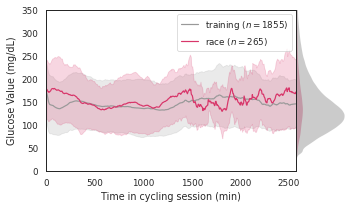

In [187]:
n_nc = len(dc.loc[dc['race'] == False, ['RIDER', 'date']].drop_duplicates())
n_rc = len(dc.loc[dc['race'] == True, ['RIDER', 'date']].drop_duplicates())

t_max = dc.groupby('tid')['t'].max().quantile(0.9) #dc['t'].max()

fig, ax = plt.subplots(1,2, figsize=(5, 3), sharey=True, gridspec_kw={'width_ratios': [5, 1], 'wspace':0}, tight_layout=True)
sns.lineplot(x=dc['t'], y=dc[COL], hue=dc['race'], ci='sd', palette=list(color_race.values()), ax=ax[0])
ax[0].set_xlabel('Time in cycling session (min)')
ax[0].legend(loc='upper right', handles=ax[0].get_legend().get_lines(), 
	labels=['training'+r' ($n = {:.0f}$)'.format(n_nc), 'race'+r' ($n = {:.0f}$)'.format(n_rc)])
sns.kdeplot(data=dc.loc[dc['t'].notna()], y=COL, hue='race', ax=ax[1],
	fill=True, alpha=.5, palette=list(color_race.values()), linewidth=0, legend=False)
sns.despine(bottom=True, right=True, top=True, ax=ax[1])
ax[1].set(xlabel=None, xticks=[])
plt.ylim((0,350))
ax[0].set_xlim((0, t_max))
savefig('time_cycling/glucose_cycling')

Individual athletes

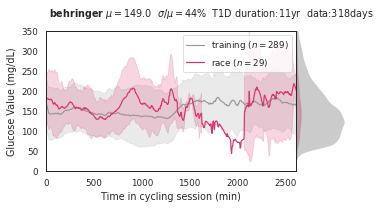

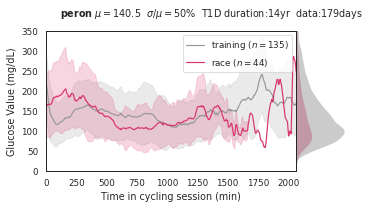

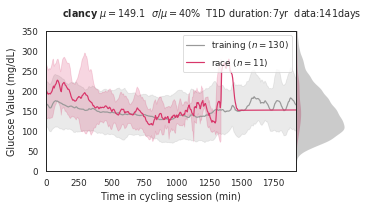

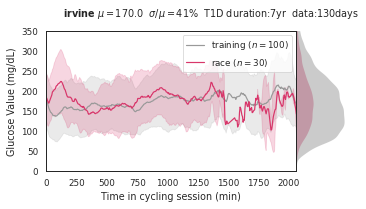

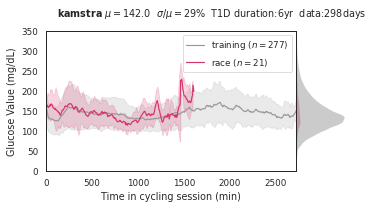

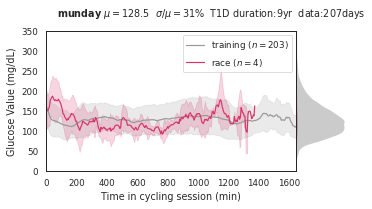

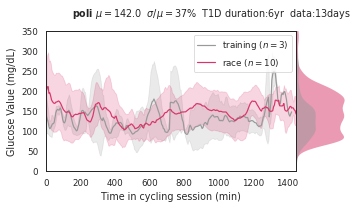

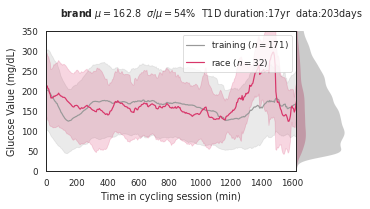

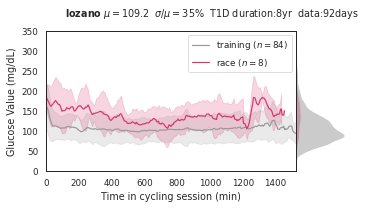

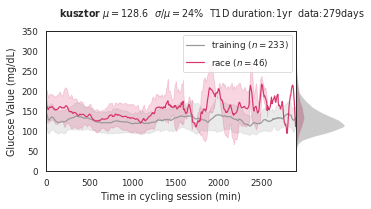

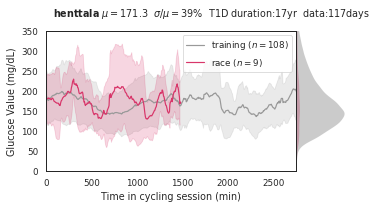

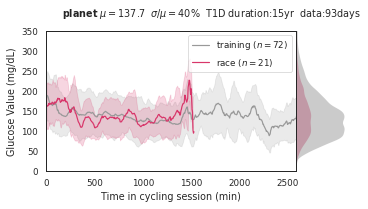

In [198]:
for i in dc[dc['race']].RIDER.unique():
	n_nc = len(dc.loc[(dc.RIDER == i) & (dc['race'] == False), 'local_timestamp'].dt.date.unique())
	n_rc = len(dc.loc[(dc.RIDER == i) & (dc['race'] == True), 'local_timestamp'].dt.date.unique())

	t_max = dc[dc.RIDER == i].groupby('tid')['t'].max().quantile(0.9)#dc.loc[dc.RIDER == i, 't'].max()

	fig, ax = plt.subplots(1,2, figsize=(5, 3), sharey=True, gridspec_kw={'width_ratios': [5, 1], 'wspace':0}, tight_layout=True)
	sns.lineplot(x=dc.loc[dc.RIDER == i,'t'], y=dc.loc[dc.RIDER == i, COL], ci='sd', hue=dc['race'], palette=list(color_race.values()), ax=ax[0])
	ax[0].set_xlabel('Time in cycling session (min)')
	ax[0].legend(loc='upper right', handles=ax[0].get_legend().get_lines(),
		labels=['training'+r' ($n = {:.0f}$)'.format(n_nc), 'race'r' ($n = {:.0f}$)'.format(n_rc)])
	sns.kdeplot(data=dc.loc[dc['t'].notna() & (dc.RIDER == i)], y=COL, hue='race', ax=ax[1],
		fill=True, alpha=.5, palette=list(color_race.values()), linewidth=0, legend=False)
	sns.despine(bottom=True, right=True, top=True, ax=ax[1])
	ax[1].set(xlabel=None, xticks=[])
	plt.ylim((0,350))
	ax[0].set_xlim((0, t_max))
	title = r'$\mu = {:.1f}$  $\sigma/\mu = {:.0f}\%$  T1D duration:{:.0f}yr  data:{:.0f}days'\
		.format(dc[dc.RIDER == i][COL].mean(),
				dc[dc.RIDER == i][COL].std()/dc[dc.RIDER == i][COL].mean()*100,
				info.loc[i, 'diabetes_duration'],
				len(dc_agg[dc_agg['completeness_1d'] >= 0.7].loc[i]))
	savefig(path='time_cycling/glucose_cycling', i=i, title=title, x=-1.7, y=1.06)

In [ ]:
#### TODO: TrainingPeaks descriptives

# Also, hypo/hyper in different times for different features
# So merge TP and DC

In [ ]:
# -------------------------- Descriptives
# TODO: gender (m/f), CSII/MDI
# CGM completeness
# CSII / MDI (1/10)
# VO2max (mL min-1 kg-1)
# IPAQ score (MET min week-1)
dict_stats = {'age'								: 'Age (yr)',
			  'height'							: 'Height (cm)',
			  'weight'							: 'Weight (cm)',
			  'bf(%)'							: 'Fat mass (%)',
			  'diabetes_duration'				: 'Diabetes duration (yr)',
			  'HbA1c'							: 'HbA_{1c} (%)',
			  'cgm_days'						: 'Days with CGM coverage >70 %',
			  'cgm_mean'						: 'Mean glucose (mg/dL)',
			  'cgm_cv'							: 'Glycemic variability (%)',
			  'hypo L2'							: 'hypoglycemia L2 (<54 mg/dL)',
			  'hypo L1'							: 'hypoglycemia L1 (54-69 mg/dL)',
			  'target'							: 'target range (70-180 mg/dL)',
			  'hyper L1'						: 'hyperglycemia L1 (181-250 mg/dL)',
			  'hyper L2'						: 'hyperglycemia L2 (>250 mg/dL)',
			  'FTP_per_kg'						: 'Functional threshold power (W/kg)',
			  'LTHR'							: 'Lactate threshold heart rate (bpm)',
			  'HRmax'							: 'HR_{max} (bpm)',
			  'VO2max'							: 'VO_{2max} (mL/min/kg)',
			  'days_cycled'						: 'Days cycled',
			  'days_raced'						: 'Days participated in competition',
			  'km_cycled'						: 'Distance cycled (km/yr)',
			  'hours_cycled_per_cycling_day'	: 'Mean time cycled (h/day)',
			  'km_cycled_per_cycling_day'		: 'Mean distance cycled (km/day)',
			  'km_ascended_per_cycling_day'		: 'Mean distance ascended (km/day)'}

In [ ]:
glucose_levels = {'hypo L2': (0,53),
				  'hypo L1': (54,69),
				  'target' : (70,180),
				  'hyper L1': (181,250),
				  'hyper L2': (251,10000)}

In [ ]:
# info
info = pd.read_csv(DATA_PATH+'./info.csv', index_col=0)
info.set_index('RIDER', inplace=True)
info['FTP_per_kg'] = info['FTP'] / info['weight']
info.drop('FTP', axis=1, inplace=True)

cols_info = ['age', 'height', 'weight', 'bf(%)']
cols_diabetes = ['diabetes_duration', 'HbA1c']
cols_ex = ['FTP_per_kg', 'LTHR', 'HRmax', 'VO2max']

# cgm
cgm_avail = df.groupby(['RIDER', df.timestamp.dt.date])['Glucose Value (mg/dL)'].count().unstack().count(axis=1).rename('cgm_days')
cgm_mean = df.groupby(['RIDER'])['Glucose Value (mg/dL)'].mean().rename('cgm_mean')
cgm_cv = df.groupby('RIDER')['Glucose Value (mg/dL)'].apply(lambda x: x.std()/x.mean()*100).rename('cgm_cv')
cgm_times = df.groupby(['RIDER']).apply(lambda x: get_percinlevel(x)).apply(pd.Series)
stats_cgm = pd.concat([cgm_avail, cgm_mean, cgm_cv, cgm_times], axis=1)

# trainingpeaks
tp = pd.read_csv(DATA_PATH+'./trainingpeaks_day.csv', index_col=[0,1])
stats_cycling_year = tp.groupby('RIDER').agg({'date'			:'count', # cycling days / yr
											  'race'			:'sum', # race days / yr
											  'distance_max'	:lambda x: x.sum()/1000 # km cycled / yr
											  })\
							.rename(columns={'date'				:'days_cycled',
											 'race'				:'days_raced',
											 'distance_max'		:'km_cycled'})
stats_cycling_day = tp.groupby('RIDER').agg({ 'timestamp_count'			:lambda x: x.mean()/3600, #h cycled / cycling day
											  'distance_max'			:lambda x: x.mean()/1000, # km cycled / cycling day
											  'elevation_gain_up_sum'	:lambda x: x.mean()/1000, # km ascended / cycling day
											})\
							.rename(columns={'timestamp_count'			:'hours_cycled_per_cycling_day',
											 'distance_max'				:'km_cycled_per_cycling_day',
											 'elevation_gain_up_sum'	:'km_ascended_per_cycling_day'})

# combine
descriptives = pd.concat([info[cols_info], info[cols_diabetes], stats_cgm, info[cols_ex], stats_cycling_year, stats_cycling_day], axis=1)
descriptives_sum = pd.concat([descriptives.mean(), descriptives.std()], axis=1)
descriptives_sum = descriptives_sum.round(1).apply(lambda x: '%s $\pm$ %s'%(x[0], x[1]), axis=1).rename(index=dict_stats)
with open(SAVE_PATH+"descriptives.tex", 'w') as file:
	file.write(descriptives_sum.to_latex(column_format='c'))

In [14]:
info = pd.read_csv(DATA_PATH+'./info.csv', index_col=0)
info.set_index('RIDER', inplace=True)
info

age  diabetes_duration  height     weight     bf(%)  HbA1c  \
RIDER                                                                
1      22.0               11.0   174.0  60.500000  9.066667    6.7   
2      30.0               14.0   178.0  71.633333  8.833333    6.6   
3      26.0                7.0   171.0  66.733333  6.566667    6.8   
4      19.0                7.0   178.0  78.666667  9.433333    7.8   
5      25.0                6.0   183.0  69.633333  7.700000    6.5   
6      20.0                9.0   169.0  56.700000  4.950000    6.4   
10     27.0               17.0   185.0  75.466667  7.700000    7.3   
12     30.0                8.0   178.0  64.000000  5.600000    6.0   
13     34.0                1.0   179.0  60.333333  4.866667    6.3   
14     27.0               17.0   187.0  75.166667  9.333333    7.1   
15     25.0               15.0   179.0  73.766667  7.200000    6.4   

              FTP        LTHR       HRmax     VO2max  
RIDER                                                 
1      307.000000  176.333333  192.333333  68.888889  
2      326.000000  168.666667  181.666667  66.915285  
3      298.000000  171.000000  180.000000  66.666164  
4      356.000000  170.333333  187.333333  67.333333  
5      341.000000  179.666667  192.666667  72.857143  
6      298.500000  173.000000  184.500000  70.781588  
10     377.333333  177.000000  194.333333  73.982571  
12     347.000000  158.333333  178.666667  75.937500  
13     345.666667  173.000000  182.333333  76.666667  
14     348.000000  169.000000  189.500000  66.500000  
15     389.000000  185.000000  198.000000  66.000000

In [27]:
percinlevel = {i:get_percinlevel(df[df.RIDER == i]) for i in ATHLETES}
percinlevel = pd.DataFrame(percinlevel).T
percinlevel['hypo'] = percinlevel['hypo L2'] + percinlevel['hypo L1']
percinlevel['hyper'] = percinlevel['hyper L1'] + percinlevel['hyper L2']
percinlevel

hypo L2   hypo L1     target   hyper L1   hyper L2       hypo      hyper
1   1.209455  6.730493  64.032547  19.491675   8.535830   7.939947  28.027506
2   3.319630  8.091153  66.078939  14.069814   8.224224  11.410783  22.294038
3   1.387432  4.821754  67.102023  20.653035   6.035756   6.209185  26.688791
4   1.772771  3.610159  57.773782  26.127999  10.715289   5.382930  36.843288
5   0.219195  1.275101  83.175026  13.625436   1.596823   1.494296  15.222259
6   0.450731  2.496993  86.588687   9.486084   0.966444   2.947724  10.452528
10  7.973185  6.257463  47.707133  20.995077  17.065047  14.230648  38.060124
12  2.273402  9.284984  83.716633   4.368628   0.326657  11.558386   4.695285
13  0.018693  0.447523  93.712683   5.647369   0.169333   0.466216   5.816702
14  0.309965  1.706257  62.468134  23.988992  11.309386   2.016222  35.298378
15  2.384216  5.185671  71.842403  16.743160   3.844549   7.569887  20.587709

In [28]:
diab = pd.concat([info, percinlevel], axis=1)
diab

age  diabetes_duration  height     weight     bf(%)  HbA1c         FTP  \
1   22.0               11.0   174.0  60.500000  9.066667    6.7  307.000000   
2   30.0               14.0   178.0  71.633333  8.833333    6.6  326.000000   
3   26.0                7.0   171.0  66.733333  6.566667    6.8  298.000000   
4   19.0                7.0   178.0  78.666667  9.433333    7.8  356.000000   
5   25.0                6.0   183.0  69.633333  7.700000    6.5  341.000000   
6   20.0                9.0   169.0  56.700000  4.950000    6.4  298.500000   
10  27.0               17.0   185.0  75.466667  7.700000    7.3  377.333333   
12  30.0                8.0   178.0  64.000000  5.600000    6.0  347.000000   
13  34.0                1.0   179.0  60.333333  4.866667    6.3  345.666667   
14  27.0               17.0   187.0  75.166667  9.333333    7.1  348.000000   
15  25.0               15.0   179.0  73.766667  7.200000    6.4  389.000000   

          LTHR       HRmax     VO2max   hypo L2   hypo L1     target  \
1   176.333333  192.333333  68.888889  1.209455  6.730493  64.032547   
2   168.666667  181.666667  66.915285  3.319630  8.091153  66.078939   
3   171.000000  180.000000  66.666164  1.387432  4.821754  67.102023   
4   170.333333  187.333333  67.333333  1.772771  3.610159  57.773782   
5   179.666667  192.666667  72.857143  0.219195  1.275101  83.175026   
6   173.000000  184.500000  70.781588  0.450731  2.496993  86.588687   
10  177.000000  194.333333  73.982571  7.973185  6.257463  47.707133   
12  158.333333  178.666667  75.937500  2.273402  9.284984  83.716633   
13  173.000000  182.333333  76.666667  0.018693  0.447523  93.712683   
14  169.000000  189.500000  66.500000  0.309965  1.706257  62.468134   
15  185.000000  198.000000  66.000000  2.384216  5.185671  71.842403   

     hyper L1   hyper L2       hypo      hyper  
1   19.491675   8.535830   7.939947  28.027506  
2   14.069814   8.224224  11.410783  22.294038  
3   20.653035   6.035756   6.209185  26.688791  
4   26.127999  10.715289   5.382930  36.843288  
5   13.625436   1.596823   1.494296  15.222259  
6    9.486084   0.966444   2.947724  10.452528  
10  20.995077  17.065047  14.230648  38.060124  
12   4.368628   0.326657  11.558386   4.695285  
13   5.647369   0.169333   0.466216   5.816702  
14  23.988992  11.309386   2.016222  35.298378  
15  16.743160   3.844549   7.569887  20.587709

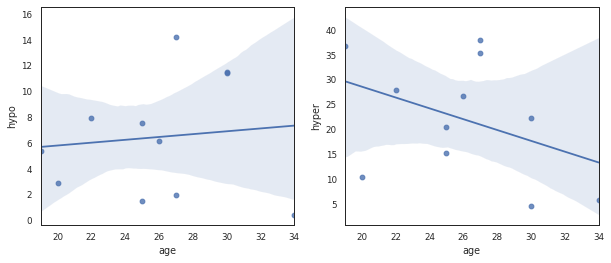

In [34]:
fig, axs = plt.subplots(1,2, figsize=(10,4))
sns.regplot(x='age', y='hypo', data=diab, ax=axs[0])
sns.regplot(x='age', y='hyper', data=diab, ax=axs[1])
plt.show()

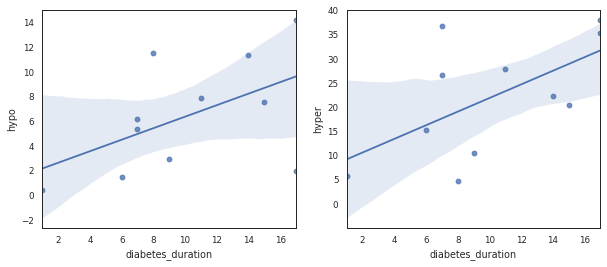

In [37]:
fig, axs = plt.subplots(1,2, figsize=(10,4))
sns.regplot(x='diabetes_duration', y='hypo', data=diab, ax=axs[0])
sns.regplot(x='diabetes_duration', y='hyper', data=diab, ax=axs[1])
plt.show()

In [39]:
import statsmodels.api as sm

diab = sm.add_constant(diab)

model = sm.OLS(diab['hypo'], diab[info.columns])
res = model.fit()
print(res.summary())

model = sm.OLS(diab['hyper'], diab[info.columns])
res = model.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                   hypo   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.858
Method:                 Least Squares   F-statistic:                              7.657
Date:                Tue, 26 Oct 2021   Prob (F-statistic):                       0.275
Time:                        21:19:31   Log-Likelihood:                         -14.273
No. Observations:                  11   AIC:                                      48.55
Df Residuals:                       1   BIC:                                      52.53
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

/local/home/evanweenen/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/local/home/evanweenen/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


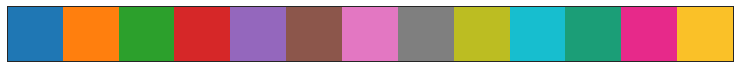

In [196]:
sns.palplot(sns.color_palette('tab10')+[sns.color_palette('Dark2')[0],
                                        sns.color_palette('Dark2')[3],
                                        sns.color_palette('inferno')[-1],
                                        sns.color_palette('inferno')])

In [201]:
sns.color_palette('YlGnBu', n_colors=7)

[(0.9288273740868896, 0.972318339100346, 0.6941637831603229),
 (0.7781776239907728, 0.9128642829680892, 0.7060976547481739),
 (0.4951787773933103, 0.8028604382929643, 0.733748558246828),
 (0.2526874279123414, 0.7114494425221068, 0.7683813917723953),
 (0.11410995770857363, 0.5647058823529412, 0.7510957324106113),
 (0.13361014994232986, 0.3647520184544406, 0.6569780853517878),
 (0.1419761630142253, 0.20144559784698193, 0.5739331026528259)]

In [198]:
sns.color_palette('inferno', n_colors=7)

[(0.129285, 0.047293, 0.290788),
 (0.3415, 0.062325, 0.429425),
 (0.54092, 0.134729, 0.415123),
 (0.735683, 0.215906, 0.330245),
 (0.894305, 0.353399, 0.193584),
 (0.978422, 0.557937, 0.034931),
 (0.974638, 0.797692, 0.206332)]

In [205]:
sns.color_palette('gist_earth_r', n_colors=7)

[(0.8518382084467404, 0.7103140233308513, 0.6171058037787064),
 (0.7389241598191383, 0.6730376114081996, 0.3849495081644698),
 (0.5947984998026056, 0.6844241296518607, 0.3452878910092465),
 (0.35862242511195164, 0.6261367892976589, 0.2930678846538615),
 (0.23071926548397137, 0.5538959866220736, 0.39004938240081705),
 (0.16464755874020998, 0.44614578142248856, 0.49399353175533156),
 (0.08101705271343665, 0.2137804600164292, 0.4712453089602375)]

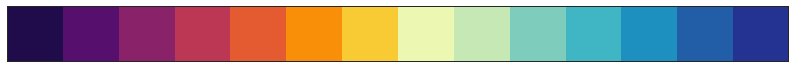

In [202]:
sns.palplot(sns.color_palette('inferno', n_colors=7)+sns.color_palette('YlGnBu', n_colors=7))

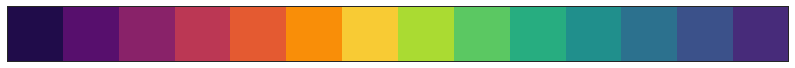

In [212]:
sns.palplot(sns.color_palette('inferno', n_colors=7)+sns.color_palette('viridis_r', n_colors=7))

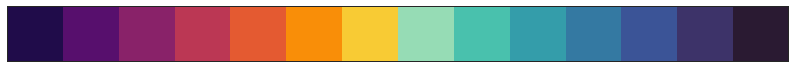

In [208]:
sns.palplot(sns.color_palette('inferno', n_colors=7)+sns.color_palette('mako_r', n_colors=7))

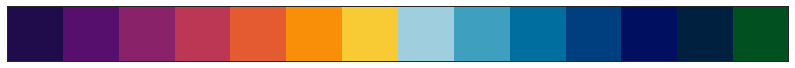

In [210]:
sns.palplot(sns.color_palette('inferno', n_colors=7)+sns.color_palette('ocean_r', n_colors=7))

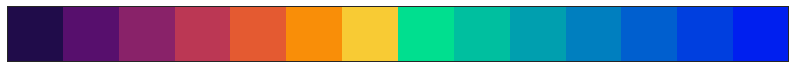

In [215]:
sns.palplot(sns.color_palette('inferno', n_colors=7)+sns.color_palette('winter_r', n_colors=7))

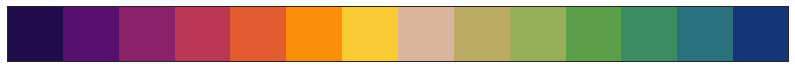

In [206]:
sns.palplot(sns.color_palette('inferno', n_colors=7)+sns.color_palette('gist_earth_r', n_colors=7))

In [189]:
sns.color_palette('tab20b')

[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098)]

In [170]:
sns.color_palette('tab10')

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [171]:
sns.color_palette('Dark2')

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4)]

In [172]:
sns.color_palette('gist_stern')

[(0.5691674045962472, 0.1411764705882353, 0.2823529411764706),
 (0.28627450980392155, 0.28627450980392155, 0.5725490196078431),
 (0.42745098039215684, 0.42745098039215684, 0.8549019607843137),
 (0.5725490196078431, 0.5725490196078431, 0.6912807676261994),
 (0.7137254901960784, 0.7137254901960784, 0.09052982895285744),
 (0.8588235294117648, 0.8588235294117647, 0.4672586015538292)]

In [169]:
sns.color_palette('brg')

[(0.2823529411764706, 0.0, 0.7176470588235294),
 (0.5725490196078431, 0.0, 0.4274509803921569),
 (0.8549019607843137, 0.0, 0.14509803921568631),
 (0.8549019607843137, 0.1450980392156863, 0.0),
 (0.5725490196078431, 0.42745098039215684, 0.0),
 (0.2823529411764706, 0.7176470588235294, 0.0)]

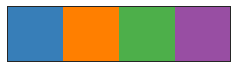

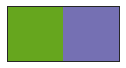

In [234]:
sns.palplot(color_sec.values()) ; plt.show()

sns.palplot([sns.color_palette('Dark2')[4], sns.color_palette('Dark2')[2]]) ; plt.show()

In [233]:
sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [141]:
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [142]:
sns.color_palette('Set3')

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [144]:
sns.color_palette('Set1')

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [117]:
sns.color_palette('tab10')

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [145]:
sns.color_palette('tab20', n_colors=14)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058)]

In [147]:
sns.color_palette('tab20b')

[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098)]

In [148]:
sns.color_palette('tab20c')

[(0.19215686274509805, 0.5098039215686274, 0.7411764705882353),
 (0.4196078431372549, 0.6823529411764706, 0.8392156862745098),
 (0.6196078431372549, 0.792156862745098, 0.8823529411764706),
 (0.7764705882352941, 0.8588235294117647, 0.9372549019607843),
 (0.9019607843137255, 0.3333333333333333, 0.050980392156862744),
 (0.9921568627450981, 0.5529411764705883, 0.23529411764705882),
 (0.9921568627450981, 0.6823529411764706, 0.4196078431372549),
 (0.9921568627450981, 0.8156862745098039, 0.6352941176470588),
 (0.19215686274509805, 0.6392156862745098, 0.32941176470588235),
 (0.4549019607843137, 0.7686274509803922, 0.4627450980392157),
 (0.6313725490196078, 0.8509803921568627, 0.6078431372549019),
 (0.7803921568627451, 0.9137254901960784, 0.7529411764705882),
 (0.4588235294117647, 0.4196078431372549, 0.6941176470588235),
 (0.6196078431372549, 0.6039215686274509, 0.7843137254901961)]

In [149]:
sns.color_palette('Paired')

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392),
 (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765)]

In [159]:
sns.color_palette('Dark2')

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4)]

In [203]:
sns.color_palette('gist_stern', n_colors=14)

[(0.9403811230585424, 0.06666666666666667, 0.13333333333333333),
 (0.6082425328554361, 0.13333333333333333, 0.26666666666666666),
 (0.27610394265232974, 0.2, 0.4),
 (0.26666666666666666, 0.26666666666666666, 0.5333333333333333),
 (0.3333333333333333, 0.3333333333333333, 0.6666666666666666),
 (0.4, 0.4, 0.8),
 (0.4666666666666667, 0.4666666666666667, 0.9333333333333333),
 (0.5333333333333333, 0.5333333333333333, 0.8581560283687943),
 (0.6, 0.6, 0.5744680851063828),
 (0.6666666666666667, 0.6666666666666666, 0.2907801418439714),
 (0.7333333333333334, 0.7333333333333333, 0.007092198581559961),
 (0.7999999999999999, 0.8, 0.24528301886792472),
 (0.8666666666666667, 0.8666666666666667, 0.4968553459119498),
 (0.9333333333333333, 0.9333333333333333, 0.7484276729559749)]

In [168]:
sns.color_palette('brg')

[(0.2823529411764706, 0.0, 0.7176470588235294),
 (0.5725490196078431, 0.0, 0.4274509803921569),
 (0.8549019607843137, 0.0, 0.14509803921568631),
 (0.8549019607843137, 0.1450980392156863, 0.0),
 (0.5725490196078431, 0.42745098039215684, 0.0),
 (0.2823529411764706, 0.7176470588235294, 0.0)]

In [162]:
sns.color_palette('CMRmap')

[(0.16941176470588235, 0.15, 0.5323529411764706),
 (0.3870588235294118, 0.16450980392156864, 0.6774509803921569),
 (0.7678431372549019, 0.22098039215686274, 0.3531372549019608),
 (0.9419607843137255, 0.3950980392156863, 0.06294117647058822),
 (0.9, 0.6774509803921569, 0.07098039215686275),
 (0.9, 0.8805882352941177, 0.44823529411764707)]

In [163]:
sns.color_palette('Spectral')

[(0.8853517877739331, 0.3190311418685121, 0.29042675893886966),
 (0.9873125720876587, 0.6473663975394078, 0.3642445213379469),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866),
 (0.9288735101883892, 0.9715494040753557, 0.6380622837370243),
 (0.6334486735870821, 0.8521337946943485, 0.6436755094194541),
 (0.2800461361014994, 0.6269896193771626, 0.7024221453287197)]

In [164]:
sns.color_palette('RdYlBu')

[(0.8899653979238754, 0.2867358708189158, 0.19815455594002307),
 (0.9873125720876587, 0.6473663975394078, 0.3642445213379469),
 (0.9971549404075356, 0.9118031526336025, 0.6153018069973087),
 (0.9118031526336026, 0.9658592848904267, 0.9111880046136099),
 (0.6409842368319879, 0.8272971933871589, 0.90080738177624),
 (0.346482122260669, 0.5492502883506344, 0.7527104959630911)]

In [165]:
sns.color_palette('plasma')

[(0.32515, 0.006915, 0.639512),
 (0.546157, 0.038954, 0.64701),
 (0.723444, 0.196158, 0.538981),
 (0.85975, 0.360588, 0.406917),
 (0.95547, 0.533093, 0.28549),
 (0.994495, 0.74088, 0.166335)]

In [166]:
sns.color_palette('inferno')

[(0.15585, 0.044559, 0.325338),
 (0.397674, 0.083257, 0.433183),
 (0.621685, 0.164184, 0.388781),
 (0.832299, 0.283913, 0.257383),
 (0.961293, 0.488716, 0.084289),
 (0.981173, 0.759135, 0.156863)]

In [167]:
sns.color_palette('rocket')

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]